In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
META_data = pd.read_csv("/content/META.csv")
GOOG_data = pd.read_csv("/content/Google.csv")
MSFT_data = pd.read_csv("/content/Microsoft.csv")
AMZN_data = pd.read_csv("/content/AMAZON.csv")

In [ ]:
META_data.tail()

Date        Open        High         Low       Close   Adj Close  \
245  2023-06-12  267.170013  271.750000  265.329987  271.049988  271.049988   
246  2023-06-13  274.880005  275.720001  269.089996  271.320007  271.320007   
247  2023-06-14  271.890015  274.989990  268.320007  273.350006  273.350006   
248  2023-06-15  272.299988  283.989990  271.420013  281.829987  281.829987   
249  2023-06-16  284.750000  287.850006  280.130005  281.000000  281.000000   

       Volume  
245  15442500  
246  16164000  
247  19175100  
248  25973500  
249  43102500

In [ ]:
GOOG_data.tail()

Date        Open        High         Low       Close   Adj Close  \
245  2023-06-12  123.394997  124.750000  122.349998  124.349998  124.349998   
246  2023-06-13  125.650002  125.860001  123.845001  124.430000  124.430000   
247  2023-06-14  123.800003  124.790001  122.160004  124.379997  124.379997   
248  2023-06-15  123.879997  126.160004  123.139999  125.790001  125.790001   
249  2023-06-16  126.699997  126.699997  123.790001  124.059998  124.059998   

       Volume  
245  22255700  
246  19287700  
247  24659600  
248  24517100  
249  56686800

In [ ]:
MSFT_data.tail()

Date        Open        High         Low       Close   Adj Close  \
245  2023-06-12  328.579987  332.100006  325.160004  331.850006  331.850006   
246  2023-06-13  334.470001  336.980011  330.390015  334.290009  334.290009   
247  2023-06-14  334.339996  339.040009  332.809998  337.339996  337.339996   
248  2023-06-15  337.480011  349.839996  337.200012  348.100006  348.100006   
249  2023-06-16  351.320007  351.470001  341.950012  342.329987  342.329987   

       Volume  
245  24260300  
246  22951300  
247  26003800  
248  38899100  
249  46533600

In [ ]:
AMZN_data.tail()

Date        Open        High         Low       Close   Adj Close  \
866  2023-06-12  124.019997  126.779999  123.529999  126.570000  126.570000   
867  2023-06-13  128.119995  128.410004  125.180000  126.660004  126.660004   
868  2023-06-14  126.699997  126.949997  124.120003  126.419998  126.419998   
869  2023-06-15  125.209999  127.690002  124.320000  127.110001  127.110001   
870  2023-06-16  127.709999  127.900002  125.300003  125.489998  125.489998   

       Volume  
866  51338000  
867  50564800  
868  52422500  
869  60458500  
870  84188100

In [ ]:
META_data.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   168.920800  172.124360  166.682680  169.468440  169.468440   
std     45.801821   46.296720   45.589156   46.048968   46.048968   
min     90.080002   90.459999   88.089996   88.910004   88.910004   
25%    132.899997  136.827503  131.489994  133.284996  133.284996   
50%    165.334999  168.089996  161.620002  164.319999  164.319999   
75%    199.732495  201.682495  195.924995  199.309998  199.309998   
max    284.750000  287.850006  280.130005  281.829987  281.829987   

             Volume  
count  2.500000e+02  
mean   3.255829e+07  
std    2.203708e+07  
min    1.200760e+07  
25%    2.121332e+07  
50%    2.646955e+07  
75%    3.541882e+07  
max    2.323166e+08

In [ ]:
GOOG_data.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   104.342808  105.892337  103.119244  104.545006  104.545006   
std     10.725169   10.855443   10.717420   10.836630   10.836630   
min     85.510002   86.550003   83.449997   83.489998   83.489998   
25%     95.749998   97.344997   94.440003   95.835001   95.835001   
50%    102.799999  104.205002  101.857502  103.549999  103.549999   
75%    112.108874  114.039574  110.878574  112.274124  112.274124   
max    127.574997  129.550003  125.970001  127.910004  127.910004   

             Volume  
count  2.500000e+02  
mean   2.774022e+07  
std    1.097724e+07  
min    8.567800e+06  
25%    2.101290e+07  
50%    2.496995e+07  
75%    3.132605e+07  
max    9.779860e+07

In [ ]:
MSFT_data.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   264.925440  268.071760  262.061160  265.261760  263.946007   
std     28.793224   28.744187   28.930344   28.979257   29.327804   
min    217.550003  220.410004  213.429993  214.250000  212.649246   
25%    243.120003  245.302502  240.187500  242.482498  240.980095   
50%    257.544999  260.414994  254.540001  257.070007  256.089707   
75%    282.087494  284.294990  279.170006  282.739991  280.751213   
max    351.320007  351.470001  341.950012  348.100006  348.100006   

             Volume  
count  2.500000e+02  
mean   2.882395e+07  
std    1.018135e+07  
min    9.200800e+06  
25%    2.249102e+07  
50%    2.657605e+07  
75%    3.171822e+07  
max    8.610200e+07

In [ ]:
AMZN_data.describe()

Open        High         Low       Close   Adj Close  \
count  871.000000  871.000000  871.000000  871.000000  871.000000   
mean   137.386034  139.205534  135.446171  137.328030  137.328030   
std     29.463067   29.498646   29.283973   29.340839   29.340839   
min     82.075500   83.480003   81.301498   81.820000   81.820000   
25%    108.180001  111.404999  106.855004  108.824001  108.824001   
50%    148.500000  151.199997  144.399994  147.898499  147.898499   
75%    163.468002  165.042000  161.359245  163.229751  163.229751   
max    187.199997  188.654007  184.839493  186.570496  186.570496   

             Volume  
count  8.710000e+02  
mean   7.891493e+07  
std    3.425060e+07  
min    2.903800e+07  
25%    5.625400e+07  
50%    6.881800e+07  
75%    9.207900e+07  
max    3.113460e+08

In [ ]:
company_list = [META_data, GOOG_data, MSFT_data, AMZN_data]
company_name = ["META", "GOOGLE", "MICROSOFT", "AMAZON"]
tech_list = ['META', 'GOOG', 'MSFT', 'AMZN']

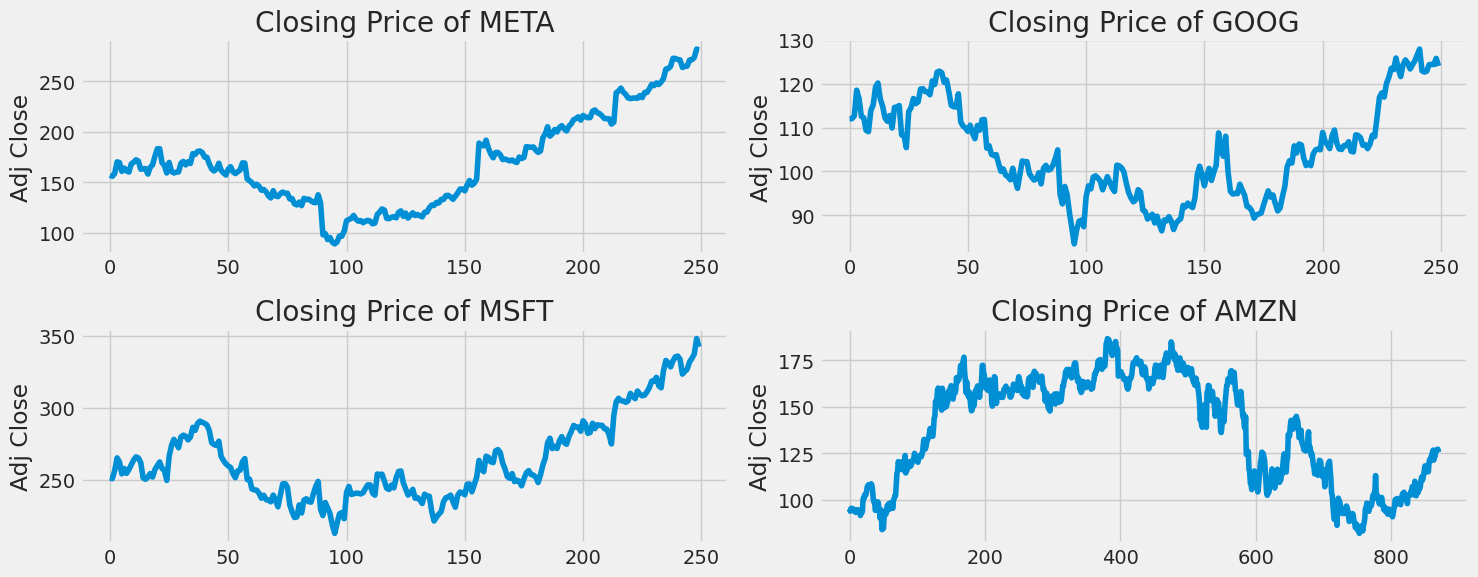

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


In [ ]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x700 with 0 Axes>

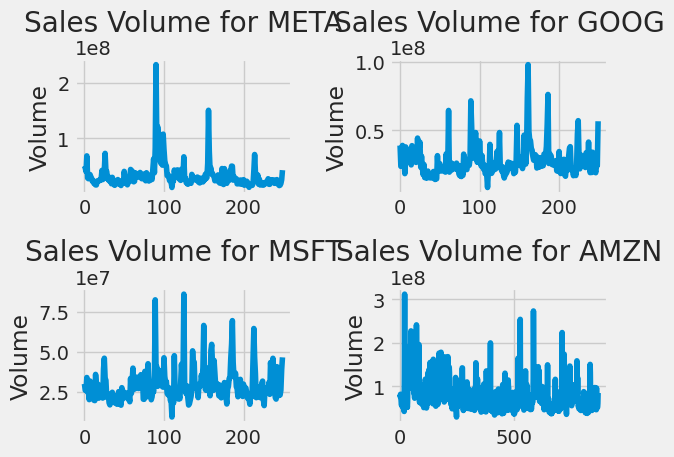

In [ ]:
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Text(0.5, 1.0, 'AMAZON')

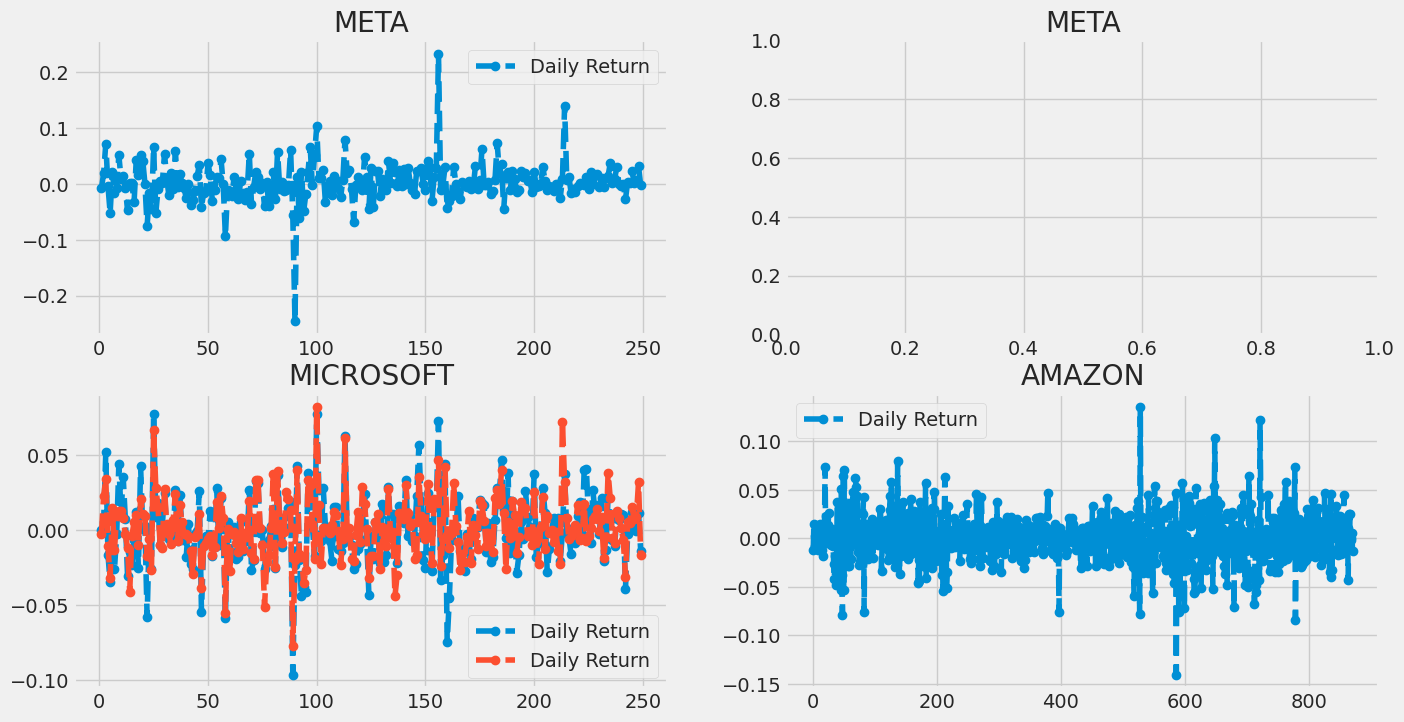

In [ ]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

META_data['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('META')
GOOG_data['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('META')
MSFT_data['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN_data['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

<ipython-input-17-426101628b7e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
<ipython-input-17-426101628b7e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
<ipython-input

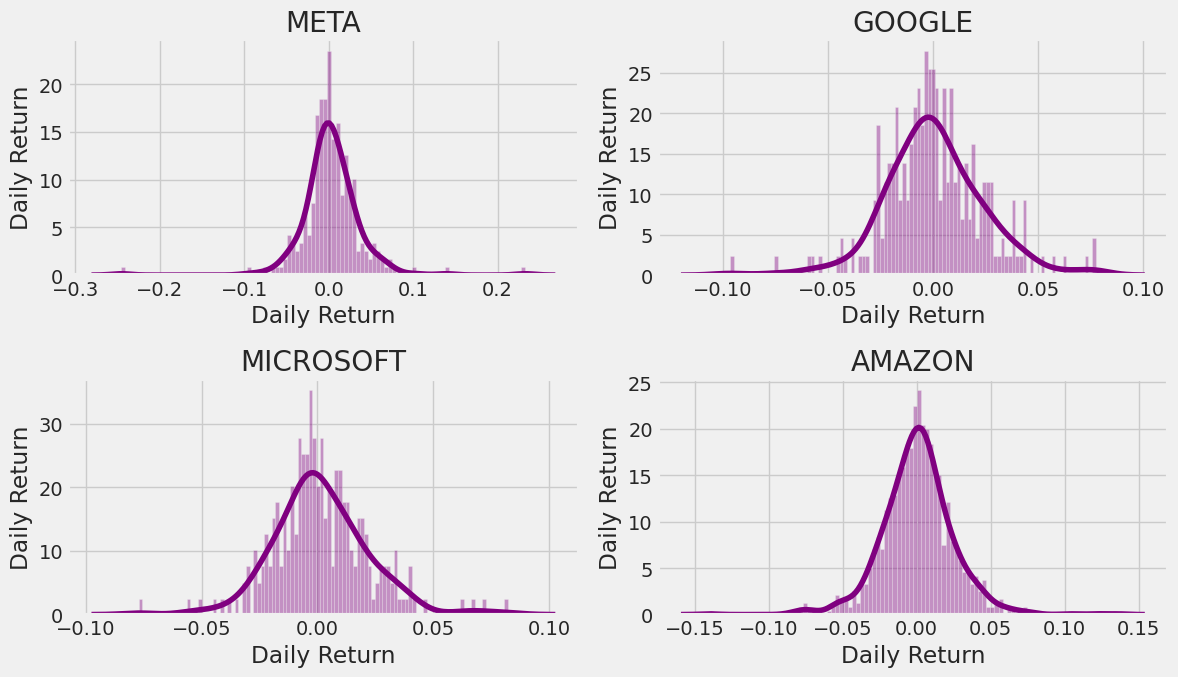

In [ ]:
plt.figure(figsize=(12, 7))
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
  plt.ylabel('Daily Return')
  plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

# **For META Dataset**

In [ ]:
data = META_data.filter(["Close"])

In [ ]:
dataset = data.values

In [ ]:
dataset.shape

(250, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset)

In [ ]:
training_data_len = int(np.ceil(len(dataset) * 0.70))
dataset_len = len(dataset)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_len), :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_data)):
  x_val.append(val_data[i - 60 : i, 0])


In [ ]:
x_val = np.array(x_val)

In [ ]:
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (115, 60, 1)
x_val shape:  (37, 60, 1)
x_test shape:  (38, 60, 1)

y_train shape:  (115,)
y_val shape:  (37, 1)
y_test shape:  (38, 1)


In [ ]:
from sklearn.metrics import (
mean_squared_error,
mean_absolute_error,
mean_absolute_percentage_error
)

In [ ]:
def get_results(model, X, y):
  results = {}
  predictions = model.predict(X)
  results["mse"] = mean_squared_error(predictions, y)
  results["mae"] = mean_absolute_error(predictions, y)
  results["mape"] = mean_absolute_percentage_error(predictions, y)
  return results


# **Using The LSTM model for prdiction**

In [ ]:
lstm_model=Sequential()
lstm_model.add(
    LSTM(
        128,
        return_sequences=True,
        input_shape=(
            x_train.shape[1],
            1,
        ),
    )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=100)

Epoch 1/100
115/115 [==============================] - 11s 16ms/step - loss: 0.0085 - val_loss: 0.0124
Epoch 2/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0053 - val_loss: 0.0126
Epoch 3/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0041 - val_loss: 0.0123
Epoch 4/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 5/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0106
Epoch 6/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0247
Epoch 7/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 8/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0245
Epoch 9/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0034 - val_loss: 0.0071
Epoch 10/100
115/115 [==============================] - 1s 8ms/step - loss: 0.0033 - val_

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)

2/2 [==============================] - 0s 17ms/step


In [ ]:
print("Train results: ",lstm_train_results)
print("Test results: ",lstm_test_results)
print("Val results: ",lstm_val_results)

Train results:  {'mse': 0.11057305791961583, 'mae': 0.2955017483459164, 'mape': 4.723334270132778}
Test results:  {'mse': 1.1074930109932242, 'mae': 1.0461461347650651, 'mape': 4.984336884750358}
Val results:  {'mse': 0.5605454425877804, 'mae': 0.7436851243319703, 'mape': 4.926845044100282}


# **Visualising the results**

In [ ]:
pd.options.mode.chained_assignment = None

2/2 [==============================] - 0s 22ms/step


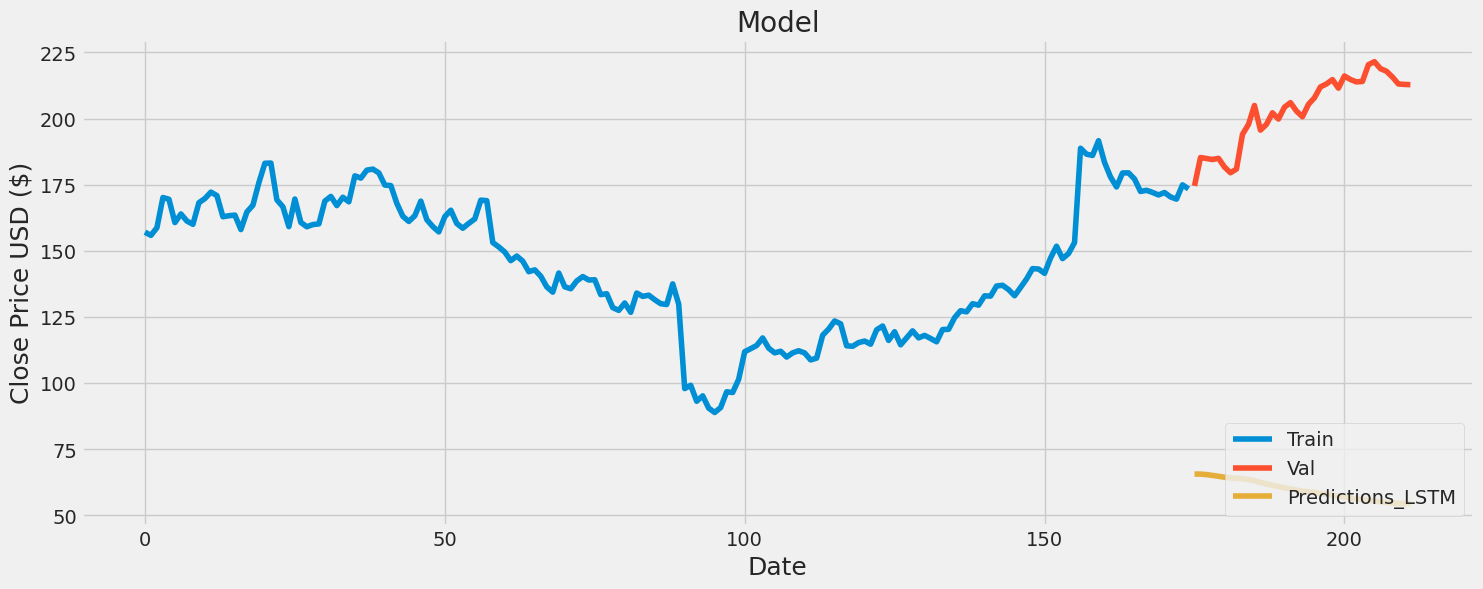

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Using the ARIMA Time-series model**

In [ ]:
from sklearn.metrics import (
mean_squared_error,
mean_absolute_error,
mean_absolute_percentage_error
)

In [ ]:
def get_results_arima(predictions, actual):
  results = {}
  results["mse"] = mean_squared_error(predictions, actual)
  results["mae"] = mean_absolute_error(predictions, actual)
  results["mape"] = mean_absolute_percentage_error(predictions, actual)
  return results


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])

arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}


100%|██████████| 115/115 [00:30<00:00,  3.83it/s]


In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
  model = ARIMA(val_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  val_predictions.append(output[0])
  val_history.append(y_val[t][0])


100%|██████████| 37/37 [00:13<00:00,  2.74it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
  model = ARIMA(test_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  test_predictions.append(output[0])
  test_history.append(y_test[t][0])


100%|██████████| 38/38 [00:09<00:00,  3.88it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.0009624579508584548, 'mae': 0.01875113027275483, 'mape': 0.16874635838341984}
Val results:  {'mse': 0.0004926600957022889, 'mae': 0.0161126104141987, 'mape': 0.028892501639379897}
Test results:  {'mse': 0.0009600856066812761, 'mae': 0.017495686103517486, 'mape': 0.02270647795403904}


# **Visualizing the data**

In [ ]:
test_predictions = np.array(test_predictions)

In [ ]:
x_test_reshaped = np.squeeze(x_test)

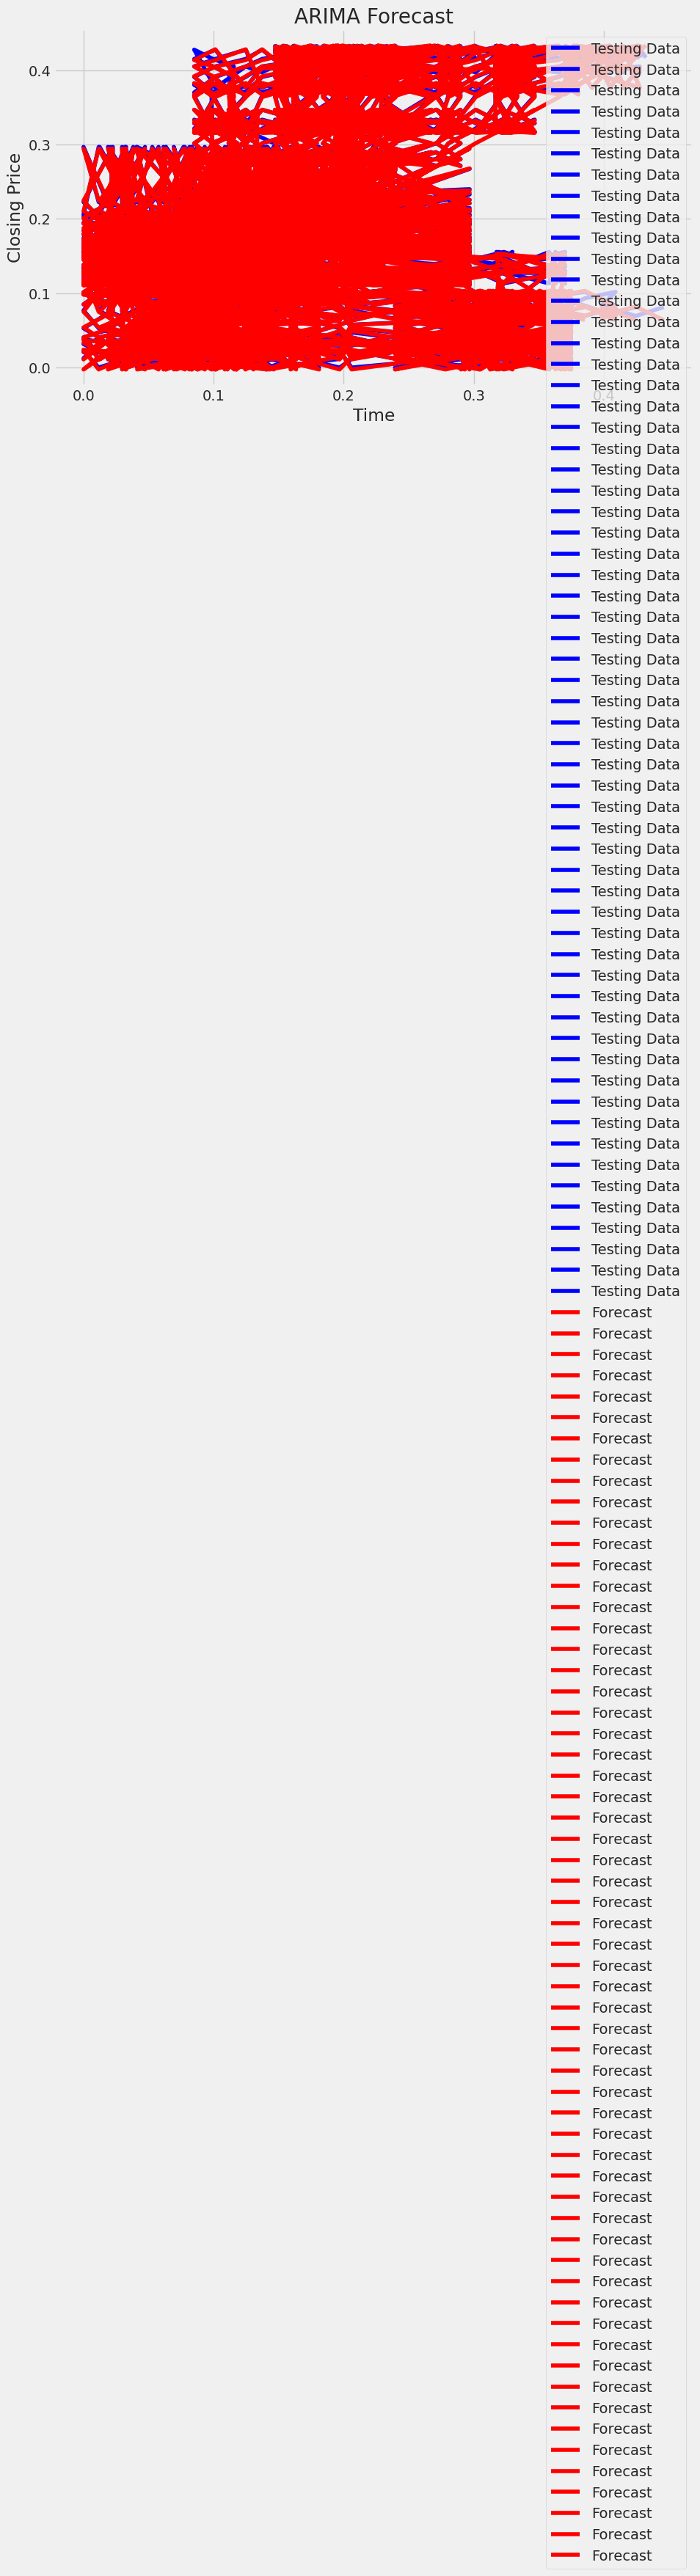

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test_reshaped, y_test, label='Testing Data', color='blue')
plt.plot(x_test_reshaped, test_predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **Using ML based Regression models**

In [ ]:
pip install tsfel

In [ ]:
import tsfel
from tsfel.feature_extraction import features
cfg = tsfel.get_features_by_domain()

In [ ]:
x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)
x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)
x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)

*** Feature extraction started ***


<ipython-input-69-3203f34e5bdc>:1: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-69-3203f34e5bdc>:2: UserWarning: Using default sampling frequency set in configuration file.
  x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-69-3203f34e5bdc>:3: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)



*** Feature extraction finished ***


In [ ]:
x_train_tsf

0_Absolute energy  0_Area under the curve  0_Autocorrelation  0_Centroid  \
0             9.711946                0.236915           9.711946    0.293294   
1             9.685995                0.236607           9.685995    0.290200   
2             9.654062                0.236121           9.654062    0.286658   
3             9.616885                0.235224           9.616885    0.283624   
4             9.527359                0.234044           9.527359    0.281821   
..                 ...                     ...                ...         ...   
110           5.040544                0.152873           5.040544    0.435866   
111           5.212620                0.156061           5.212620    0.432850   
112           5.380392                0.159279           5.380392    0.429245   
113           5.543724                0.162192           5.543724    0.425504   
114           5.719689                0.164937           5.719689    0.423274   

     0_ECDF Percentile Count_0  0_ECDF Percentile Count_1  \
0                         12.0                       48.0   
1                         12.0                       48.0   
2                         12.0                       48.0   
3                         12.0                       48.0   
4                         12.0                       48.0   
..                         ...                        ...   
110                       12.0                       48.0   
111                       12.0                       48.0   
112                       12.0                       48.0   
113                       12.0                       48.0   
114                       12.0                       48.0   

     0_ECDF Percentile_0  0_ECDF Percentile_1  0_ECDF_0  0_ECDF_1  ...  \
0               0.368132             0.423284  0.016667  0.033333  ...   
1               0.368132             0.423284  0.016667  0.033333  ...   
2               0.368132             0.423284  0.016667  0.033333  ...   
3               0.368132             0.423284  0.016667  0.033333  ...   
4               0.364192             0.423284  0.016667  0.033333  ...   
..                   ...                  ...       ...       ...  ...   
110             0.144982             0.431111  0.016667  0.033333  ...   
111             0.146071             0.431111  0.016667  0.033333  ...   
112             0.146226             0.431111  0.016667  0.033333  ...   
113             0.150995             0.431111  0.016667  0.033333  ...   
114             0.150995             0.432977  0.016667  0.033333  ...   

     0_Wavelet variance_0  0_Wavelet variance_1  0_Wavelet variance_2  \
0                0.001631              0.007776              0.014858   
1                0.001668              0.007573              0.014518   
2                0.002158              0.006946              0.013627   
3                0.002323              0.006066              0.012496   
4                0.002102              0.005433              0.011797   
..                    ...                   ...                   ...   
110              0.001803              0.005923              0.012448   
111              0.001782              0.006074              0.012150   
112              0.001855              0.006272              0.011925   
113              0.001847              0.006359              0.011732   
114              0.002009              0.006365              0.011619   

     0_Wavelet variance_3  0_Wavelet variance_4  0_Wavelet variance_5  \
0                0.021390              0.025018              0.026430   
1                0.021592              0.025619              0.027095   
2                0.021229              0.025672              0.027495   
3                0.020406              0.025265              0.027685   
4                0.019505              0.024706              0.027924   
..                    ...                   ...                   ...   
110              0.026

In [ ]:
print("Total Number of columns generated are: ",x_train_tsf.shape[1])

Total Number of columns generated are:  164


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_tsf_scaled = scaler.fit_transform(x_train_tsf)
x_val_tsf_scaled = scaler.transform(x_val_tsf)
x_test_tsf_scaled = scaler.transform(x_test_tsf)

# **Using Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lnr_model = LinearRegression().fit(x_train_tsf_scaled, y_train)
lnr_train_results = get_results(lnr_model, x_train_tsf_scaled, y_train)
lnr_val_results = get_results(lnr_model, x_val_tsf_scaled, y_val)
lnr_test_results = get_results(lnr_model, x_test_tsf_scaled, y_test)
print("Train results: ", lnr_train_results)
print("Val results: ", lnr_val_results)
print("Test results: ", lnr_test_results)

Train results:  {'mse': 5.772291386906566e-29, 'mae': 6.5532120792657064e-15, 'mape': 0.008695652173953922}
Val results:  {'mse': 8.874801059891713, 'mae': 2.4171041579565284, 'mape': 1.255458549616283}
Test results:  {'mse': 14.032468945513624, 'mae': 3.105150838025458, 'mape': 0.9704034918364857}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_LR"] = data_scaler.inverse_transform(
    np.expand_dims(lnr_model.predict(x_val_tsf_scaled), 1)
)

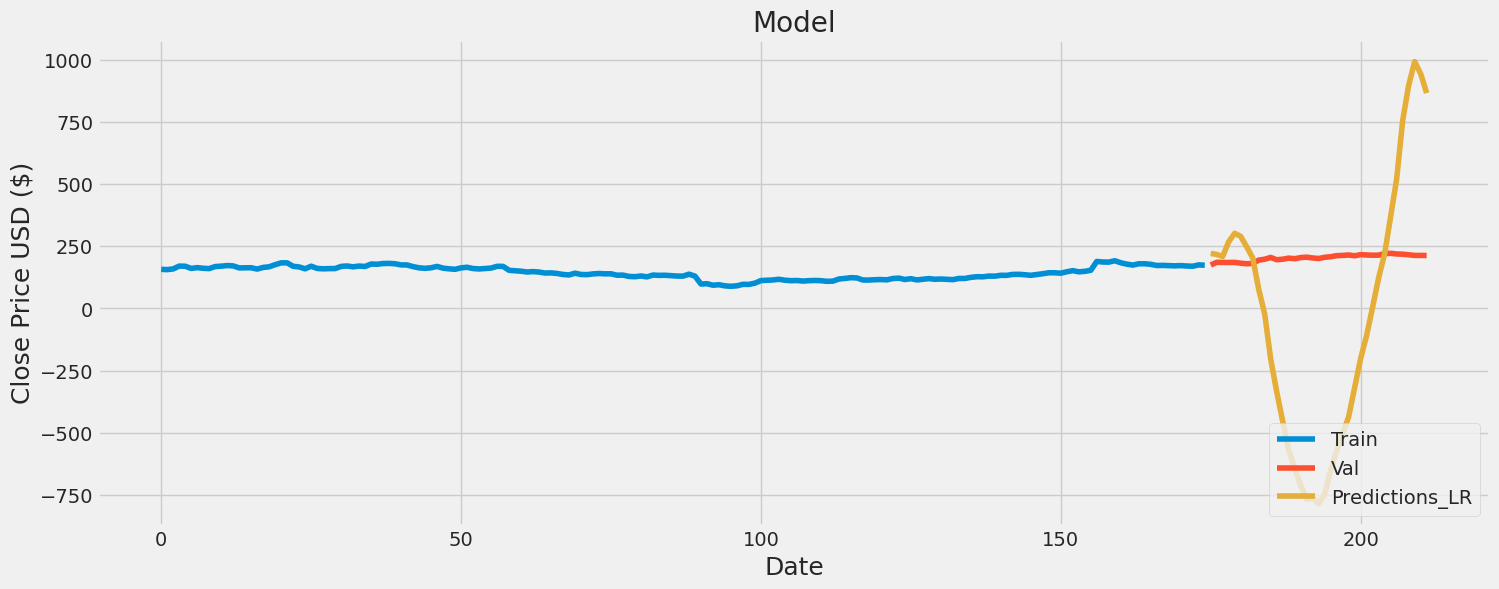

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_LR"]])
plt.legend(["Train", "Val", "Predictions_LR"], loc="lower right")
plt.show()

# **Using Support Vector Regression model**

In [ ]:
from sklearn.svm import LinearSVR
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def svr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {"C": params["C"]}
    model = LinearSVR(
         random_state=random_state,
         loss="squared_epsilon_insensitive",
         dual=False,
         **params
)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
svr_model = LinearSVR(
    random_state=42,
    loss="squared_epsilon_insensitive",
    dual=False,
)
svr_model.fit(x_train_tsf_scaled, y_train)
svm_train_results = get_results(svr_model, x_train_tsf_scaled, y_train)
svr_val_results = get_results(svr_model, x_val_tsf_scaled, y_val)
svr_test_results = get_results(svr_model, x_test_tsf_scaled, y_test)

In [ ]:
print("Train results: ", svr_train_results)
print("Val results: ", svr_val_results)
print("Test results: ", svr_test_results)

Train results:  {'mse': 0.0007109405536847984, 'mae': 0.021795962570849068, 'mape': 0.12401408277889636}
Val results:  {'mse': 0.012119079281279166, 'mae': 0.09443026201224389, 'mape': 0.25330873233550744}
Test results:  {'mse': 0.0028716128306056133, 'mae': 0.042974983991268235, 'mape': 0.2420817679013708}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_SVM"] = data_scaler.inverse_transform(
    np.expand_dims(dtr_model.predict(x_val_tsf_scaled), 1)
)

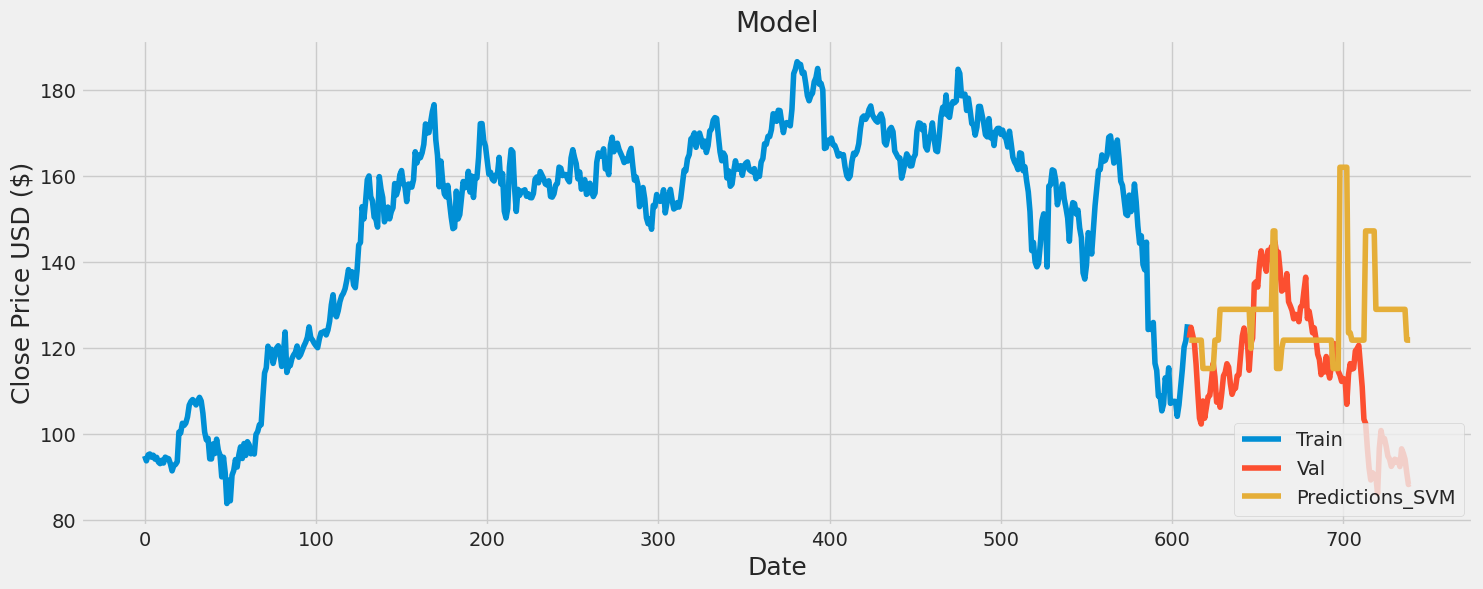

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_SVM"]])
plt.legend(["Train", "Val", "Predictions_SVM"], loc="lower right")
plt.show()

# **Using Decision Tree Regression model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import scipy
from sklearn.tree import DecisionTreeRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def dtr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
       "max_depth": params["max_depth"],
       "min_samples_split": params["min_samples_split"],
       "min_samples_leaf": params["min_samples_split"],
}
    model = DecisionTreeRegressor(random_state=random_state, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
from hyperopt.pyll import scope

In [ ]:
n_iters = 100

In [ ]:
space = {
    "max_depth": scope.int(hp.uniform("max_depth", 1, 20)),
    "min_samples_split": scope.int(hp.uniform("min_samples_split", 2, 10)),
    "min_samples_leaf": scope.int(hp.uniform("min_samples_leaf", 1, 10)),
}

In [ ]:
trials = Trials()

In [ ]:
best = fmin(
    fn=dtr_mse_cv,
    space=space,
    algo=tpe.suggest,
    max_evals=n_iters,
    trials=trials,
)

100%|██████████| 100/100 [00:01<00:00, 84.36trial/s, best loss: 0.01925578934135913]


In [ ]:
best = {k: int(v) for k, v in best.items()}
print("Best MSE {} params {}".format(dtr_mse_cv(best), best))

Best MSE 0.01925578934135913 params {'max_depth': 19, 'min_samples_leaf': 6, 'min_samples_split': 6}


In [ ]:
dtr_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
)

In [ ]:
dtr_model.fit(x_train_tsf_scaled, y_train)
dtr_train_results = get_results(dtr_model, x_train_tsf_scaled, y_train)
dtr_val_results = get_results(dtr_model, x_val_tsf_scaled, y_val)
dtr_test_results = get_results(dtr_model, x_test_tsf_scaled, y_test)

In [ ]:
print("Train results: ", dtr_train_results)
print("Validation results: ", dtr_val_results)
print("Test results: ", dtr_test_results)

Train results:  {'mse': 0.0002901078094089598, 'mae': 0.011757239253076323, 'mape': 0.08765602554365846}
Validation results:  {'mse': 0.01925578934135913, 'mae': 0.12904074771267668, 'mape': 0.28653295654396177}
Test results:  {'mse': 0.16494241101365673, 'mae': 0.39290600373215917, 'mape': 0.9073760873893025}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_DTR"] = data_scaler.inverse_transform(
    np.expand_dims(dtr_model.predict(x_val_tsf_scaled), 1)
)

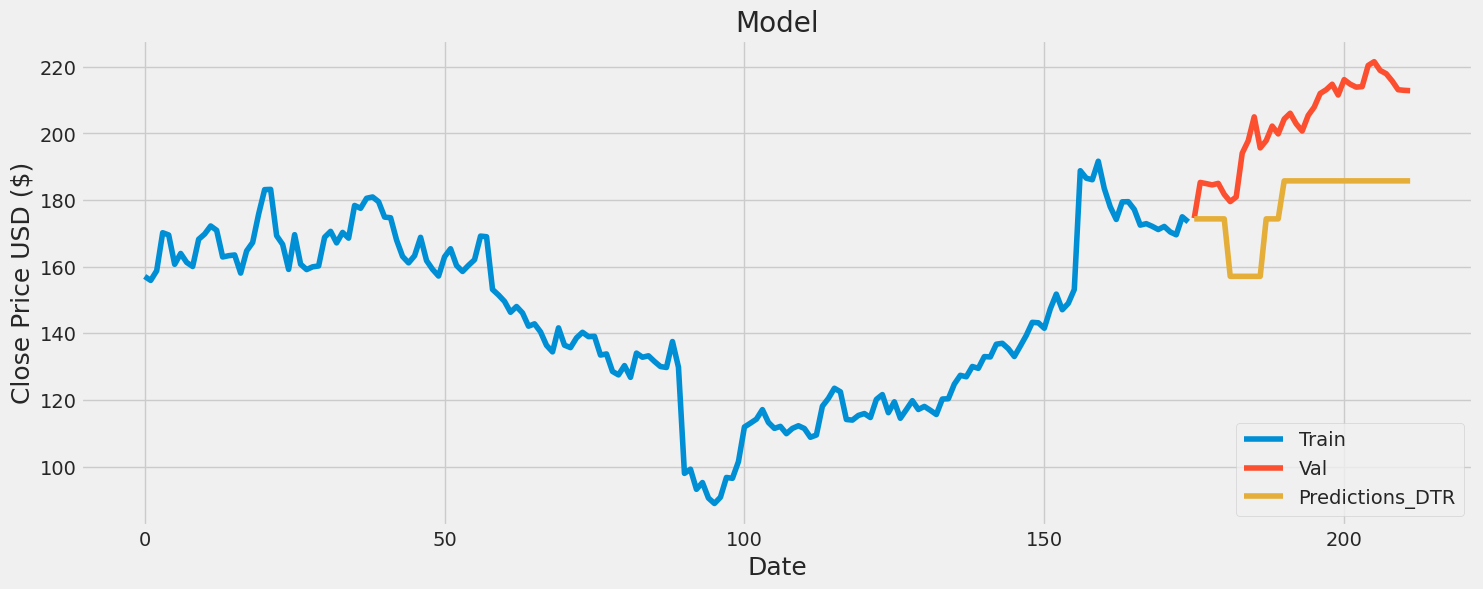

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_DTR"]])
plt.legend(["Train", "Val", "Predictions_DTR"], loc="lower right")
plt.show()

## **Using Random Forest Regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def rf_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
):
    params = {
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "min_samples_leaf": params["min_samples_split"],
}
    cv=(x_val_tsf_scaled, y_val)
    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
from hyperopt.pyll import scope

In [ ]:
n_iter = 100
space = {
    "n_estimators": scope.int(hp.uniform("n_estimators", 1, 1000)),
    "max_depth": scope.int(hp.uniform("max_depth", 1, 20)),
    "min_samples_split": scope.int(hp.uniform("min_samples_split", 2, 10)),
    "min_samples_leaf": scope.int(hp.uniform("min_samples_leaf", 1, 10)),
}
trials = Trials()

In [ ]:
best = fmin(
    fn=rf_mse_cv,
    space=space,
    algo=tpe.suggest,
    max_evals=n_iter,
    trials=trials,
)

100%|██████████| 100/100 [01:01<00:00,  1.62trial/s, best loss: 0.09027946799204889]


In [ ]:
best = {k: int(v) for k, v in best.items()}
print("Best MSE {} params {}".format(rf_mse_cv(best), best))

Best MSE 0.09027946799204889 params {'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 456}


In [ ]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
    n_jobs=-1,
)

In [ ]:
rf_model.fit(x_train_tsf_scaled, y_train)
rf_train_results = get_results(rf_model, x_train_tsf_scaled, y_train)
rf_val_results = get_results(rf_model, x_val_tsf_scaled, y_val)
rf_test_results = get_results(rf_model, x_test_tsf_scaled, y_test)
print("Train results: ", rf_train_results)
print("Val results: ", rf_val_results)
print("Test results: ", rf_test_results)

Train results:  {'mse': 0.0003133195414657312, 'mae': 0.011797557485639472, 'mape': 0.07601099446653921}
Val results:  {'mse': 0.09120080947720086, 'mae': 0.28614132400550985, 'mape': 0.9705348469946753}
Test results:  {'mse': 0.2759669723302405, 'mae': 0.5200465142524715, 'mape': 1.6581603642644482}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_RFR"] = data_scaler.inverse_transform(
    np.expand_dims(rf_model.predict(x_val_tsf_scaled), 1)
)

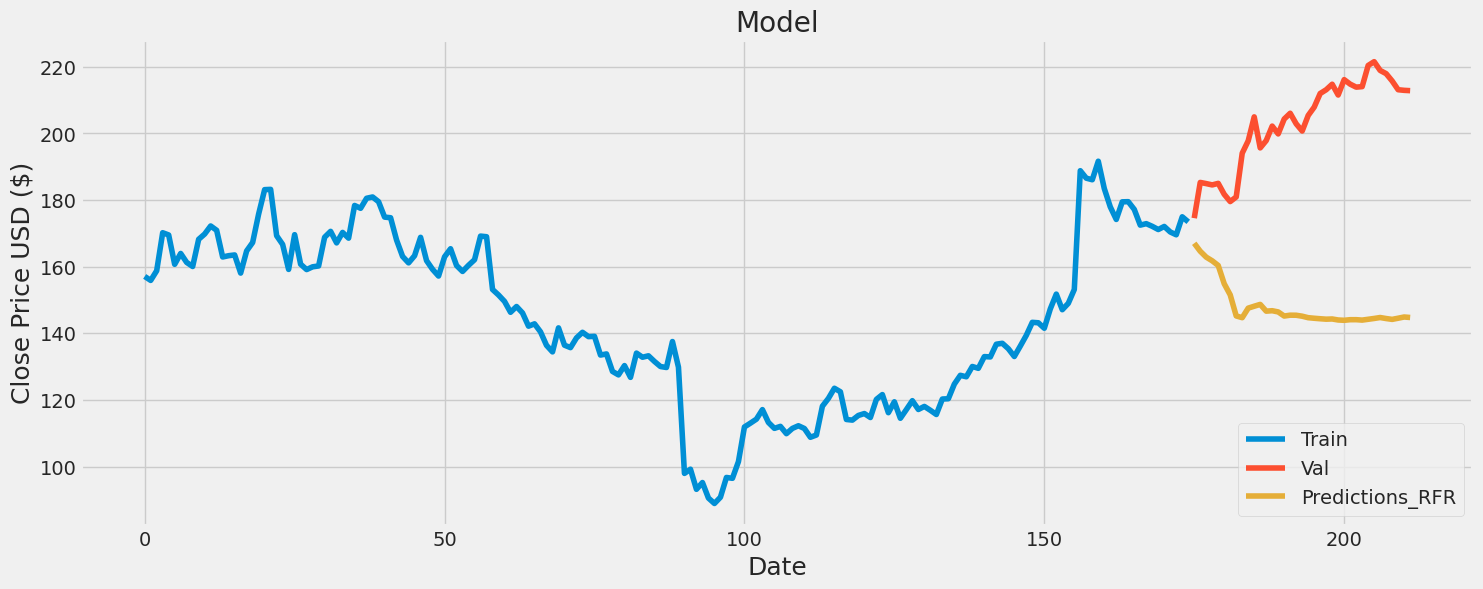

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_RFR"]])
plt.legend(["Train", "Val", "Predictions_RFR"], loc="lower right")
plt.show()

# **Using Gradient Boosting Regression model**

In [ ]:
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def lgbm_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
       "learning_rate": params["learning_rate"],
      "n_estimators": params["n_estimators"],
      "colsample_bytree": params["colsample_bytree"],
      "subsample": params["subsample"],
}
    model = LGBMRegressor(random_state=random_state, n_jobs=-1, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
from hyperopt.pyll import scope

In [ ]:
n_iter = 100
space = {
    'learning_rate': hp.uniform("learning_rate", 0.001, 0.1),
    "n_estimators": scope.int(hp.uniform("n_estimators", 1, 1000)),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.1, 1),
    "subsample": hp.uniform("subsample", 0.1, 1),
}

In [ ]:
trials = Trials()

In [ ]:
lgbm_model = LGBMRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    n_jobs=-1,
)

In [ ]:
lgbm_model.fit(x_train_tsf_scaled, y_train)
lgbm_train_results = get_results(lgbm_model, x_train_tsf_scaled, y_train)
lgbm_val_results = get_results(lgbm_model, x_val_tsf_scaled, y_val)
lgbm_test_results = get_results(lgbm_model, x_test_tsf_scaled, y_test)
print("Train results: ", lgbm_train_results)
print("Val results: ", lgbm_val_results)
print("Test results: ", lgbm_test_results)

Train results:  {'mse': 3.2989679808123177e-07, 'mae': 0.00032562219370281477, 'mape': 0.010422596429526382}
Val results:  {'mse': 0.140775726490401, 'mae': 0.3568774558211837, 'mape': 1.6497846023389973}
Test results:  {'mse': 0.31947496255884716, 'mae': 0.5576714923682938, 'mape': 2.245998798117569}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_LGBR"] = data_scaler.inverse_transform(
    np.expand_dims(rf_model.predict(x_val_tsf_scaled), 1)
)

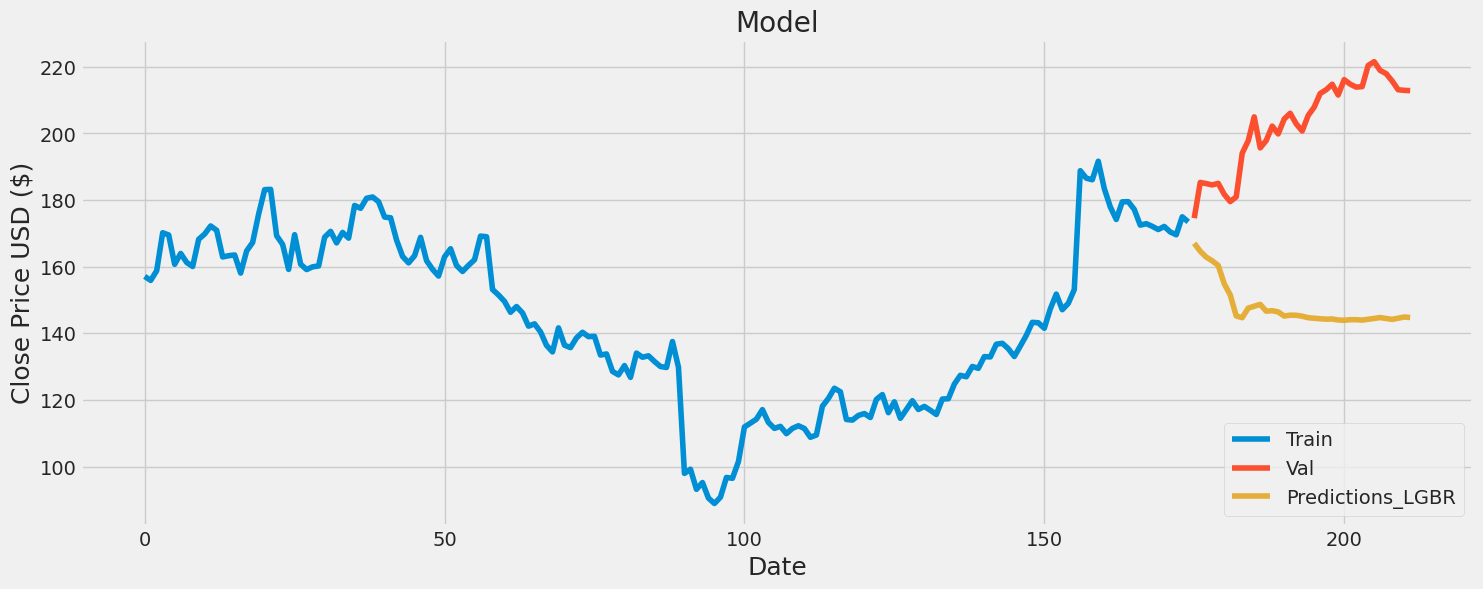

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_LGBR"]])
plt.legend(["Train", "Val", "Predictions_LGBR"], loc="lower right")
plt.show()

# **For Google stocks**

In [ ]:
data = GOOG_data.filter(["Close"])

In [ ]:
dataset = data.values

In [ ]:
dataset.shape

(250, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * 0.70))
dataset_len = len(dataset)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_len), :]
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_len : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
for i in range(60, len(val_data)):
  x_val.append(val_data[i - 60 : i, 0])


In [ ]:
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (115, 60, 1)
x_val shape:  (37, 60, 1)
x_test shape:  (38, 60, 1)

y_train shape:  (115,)
y_val shape:  (37, 1)
y_test shape:  (38, 1)


In [ ]:
y_val_reshaped=y_val.reshape(37)
y_test_reshaped=y_test.reshape(38)

In [ ]:
y_test_reshaped.shape

(38,)

In [ ]:
y_val_reshaped.shape

(37,)

In [ ]:
def get_results(model, X, y):
    results = {}
    predictions = model.predict(X)
    results["mse"] = mean_squared_error(predictions, y)
    results["mae"] = mean_absolute_error(predictions, y)
    results["mape"] = mean_absolute_percentage_error(predictions, y)
    return results

# **Using LSTM model for prediction**

In [ ]:
lstm_model = Sequential()
lstm_model.add(
LSTM(
     128,
     return_sequences=True,
     input_shape=(
         x_train.shape[1],
         1,
    ),
  )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=100)

Epoch 1/100
115/115 [==============================] - 4s 39ms/step - loss: 0.0111 - val_loss: 0.0205
Epoch 2/100
115/115 [==============================] - 6s 54ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 3/100
115/115 [==============================] - 4s 38ms/step - loss: 0.0096 - val_loss: 0.0198
Epoch 4/100
115/115 [==============================] - 4s 37ms/step - loss: 0.0086 - val_loss: 0.0173
Epoch 5/100
115/115 [==============================] - 6s 53ms/step - loss: 0.0075 - val_loss: 0.0114
Epoch 6/100
115/115 [==============================] - 4s 37ms/step - loss: 0.0068 - val_loss: 0.0211
Epoch 7/100
115/115 [==============================] - 4s 38ms/step - loss: 0.0064 - val_loss: 0.0141
Epoch 8/100
115/115 [==============================] - 6s 53ms/step - loss: 0.0059 - val_loss: 0.0084
Epoch 9/100
115/115 [==============================] - 4s 37ms/step - loss: 0.0061 - val_loss: 0.0128
Epoch 10/100
115/115 [==============================] - 4s 38ms/step - loss: 0.005

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)

2/2 [==============================] - 0s 18ms/step


In [ ]:
print("Train results: ", lstm_train_results)
print("Val results: ", lstm_val_results)
print("Test results: ", lstm_test_results)

Train results:  {'mse': 0.0033532367382274196, 'mae': 0.04464801923918222, 'mape': 0.16758100059447267}
Val results:  {'mse': 0.0064312967021456485, 'mae': 0.06639383356628516, 'mape': 0.19008056197577075}
Test results:  {'mse': 0.028673470776131523, 'mae': 0.15889078360867462, 'mape': 0.2550965352466383}


# **Visualising the predictions of LSTM**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Visualising the ARIMA data**

In [ ]:
test_predictions = np.array(test_predictions)

In [ ]:
x_test_reshaped = np.squeeze(x_test)

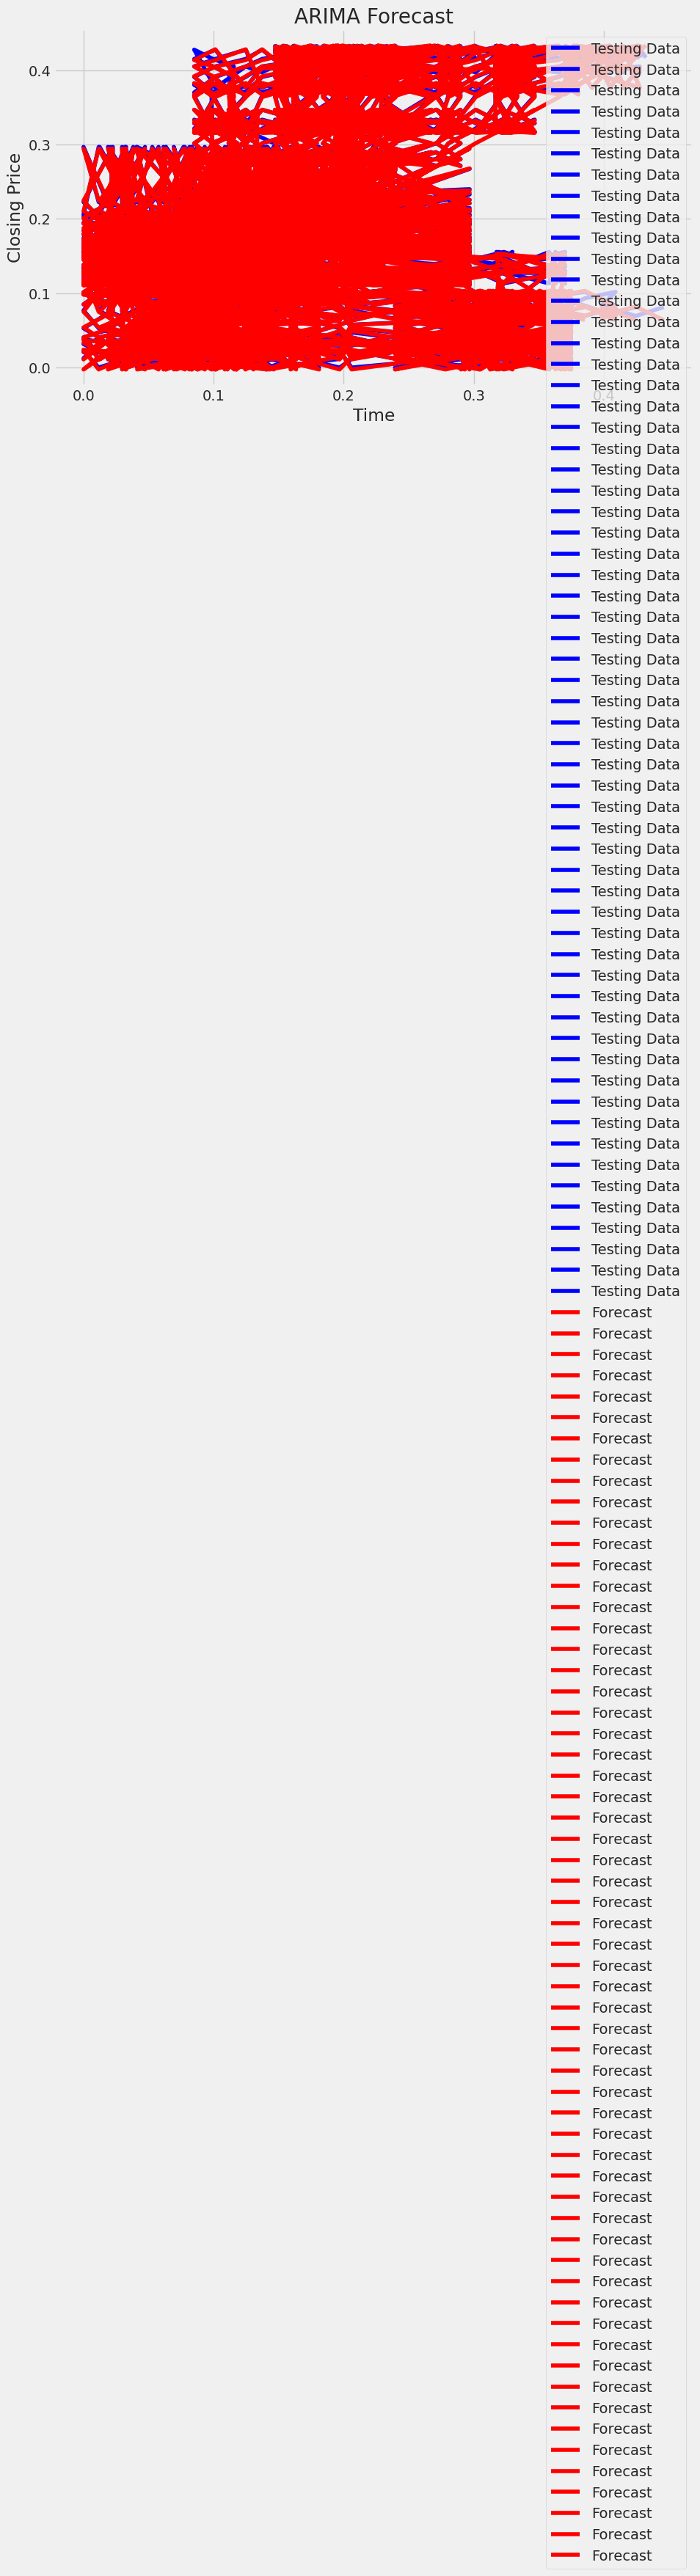

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test_reshaped, y_test, label='Testing Data', color='blue')
plt.plot(x_test_reshaped, test_predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **Using ARIMA Time series model**

In [ ]:
def get_results_arima(predictions, actual):
    results = {}
    results["mse"] = mean_squared_error(predictions, actual)
    results["mae"] = mean_absolute_error(predictions, actual)
    results["mape"] = mean_absolute_percentage_error(predictions, actual)
    return results

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])

In [ ]:
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])


100%|██████████| 115/115 [00:25<00:00,  4.52it/s]


In [ ]:
arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}

In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
    model = ARIMA(val_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    val_predictions.append(output[0])
    val_history.append(y_val[t][0])

100%|██████████| 37/37 [00:09<00:00,  3.90it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
    model = ARIMA(test_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    test_predictions.append(output[0])
    test_history.append(y_test[t][0])

100%|██████████| 38/38 [00:07<00:00,  4.76it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.003554744462020773, 'mae': 0.04348022027641455, 'mape': 0.195695193129605}
Val results:  {'mse': 0.001990583289346863, 'mae': 0.03571887238695767, 'mape': 0.10519799637461795}
Test results:  {'mse': 0.0020859181101807282, 'mae': 0.03473165741903107, 'mape': 0.048565281211093846}


# **Modeling the Machine Learning Based Regression Models**

In [ ]:
import tsfel
from tsfel.feature_extraction import features
cfg = tsfel.get_features_by_domain()

In [ ]:
x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)
x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)
x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)

*** Feature extraction started ***


<ipython-input-211-3203f34e5bdc>:1: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-211-3203f34e5bdc>:2: UserWarning: Using default sampling frequency set in configuration file.
  x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-211-3203f34e5bdc>:3: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)



*** Feature extraction finished ***


In [ ]:
x_train_tsf

0_Absolute energy  0_Area under the curve  0_Autocorrelation  0_Centroid  \
0            29.147604                0.408117          29.147604    0.289707   
1            28.946347                0.406509          28.946347    0.286097   
2            28.738992                0.404575          28.738992    0.282453   
3            28.517117                0.401902          28.517117    0.279071   
4            28.065041                0.398584          28.065041    0.277211   
..                 ...                     ...                ...         ...   
110           4.820528                0.152276           4.820528    0.330322   
111           4.748746                0.151040           4.748746    0.328995   
112           4.683633                0.149772           4.683633    0.325798   
113           4.633403                0.147808           4.633403    0.322197   
114           4.493430                0.145295           4.493430    0.325372   

     0_ECDF Percentile Count_0  0_ECDF Percentile Count_1  \
0                         12.0                       48.0   
1                         12.0                       48.0   
2                         12.0                       48.0   
3                         12.0                       48.0   
4                         12.0                       48.0   
..                         ...                        ...   
110                       12.0                       48.0   
111                       12.0                       48.0   
112                       12.0                       48.0   
113                       12.0                       48.0   
114                       12.0                       48.0   

     0_ECDF Percentile_0  0_ECDF Percentile_1  0_ECDF_0  0_ECDF_1  ...  \
0               0.594777             0.781855  0.016667  0.033333  ...   
1               0.583746             0.781855  0.016667  0.033333  ...   
2               0.582677             0.781855  0.016667  0.033333  ...   
3               0.577668             0.781855  0.016667  0.033333  ...   
4               0.576114             0.780054  0.016667  0.033333  ...   
..                   ...                  ...       ...       ...  ...   
110             0.138226             0.368753  0.016667  0.033333  ...   
111             0.138226             0.368753  0.016667  0.033333  ...   
112             0.131923             0.368753  0.016667  0.033333  ...   
113             0.131923             0.368753  0.016667  0.033333  ...   
114             0.131923             0.355470  0.016667  0.033333  ...   

     0_Wavelet variance_0  0_Wavelet variance_1  0_Wavelet variance_2  \
0                0.005686              0.027798              0.043598   
1                0.005973              0.027915              0.040726   
2                0.007790              0.025760              0.035751   
3                0.008356              0.021465              0.030493   
4                0.007290              0.016372              0.028033   
..                    ...                   ...                   ...   
110              0.002988              0.010545              0.019275   
111              0.002775              0.011704              0.020629   
112              0.003327              0.012559              0.020840   
113              0.003555              0.012594              0.019961   
114              0.003762              0.011771              0.017747   

     0_Wavelet variance_3  0_Wavelet variance_4  0_Wavelet variance_5  \
0                0.055417              0.075499              0.099983   
1                0.055701              0.079051              0.101946   
2                0.055702              0.082574              0.103710   
3                0.056117              0.085903              0.104858   
4                0.058906              0.089998              0.105655   
..                    ...                   ...                   ...   
110              0.035

In [ ]:
print("Total Number of columns generated are: ",x_train_tsf.shape[1])

Total Number of columns generated are:  164


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_tsf_scaled = scaler.fit_transform(x_train_tsf)
x_val_tsf_scaled = scaler.transform(x_val_tsf)
x_test_tsf_scaled = scaler.transform(x_test_tsf)

# **Using Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lnr_model = LinearRegression().fit(x_train_tsf_scaled, y_train)
lnr_train_results = get_results(lnr_model, x_train_tsf_scaled, y_train)
lnr_val_results = get_results(lnr_model, x_val_tsf_scaled, y_val)
lnr_test_results = get_results(lnr_model, x_test_tsf_scaled, y_test)
print("Train results: ", lnr_train_results)
print("Val results: ", lnr_val_results)
print("Test results: ", lnr_test_results)

Train results:  {'mse': 1.0139349258856459e-28, 'mae': 8.024498939725479e-15, 'mape': 0.008695652173945502}
Val results:  {'mse': 12.755232582665894, 'mae': 2.575366207823849, 'mape': 3.077128122314761}
Test results:  {'mse': 342.7093186827202, 'mae': 17.53296327896304, 'mape': 1.049974825845586}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lnr_model.predict(x_val_tsf_scaled), 1)
)

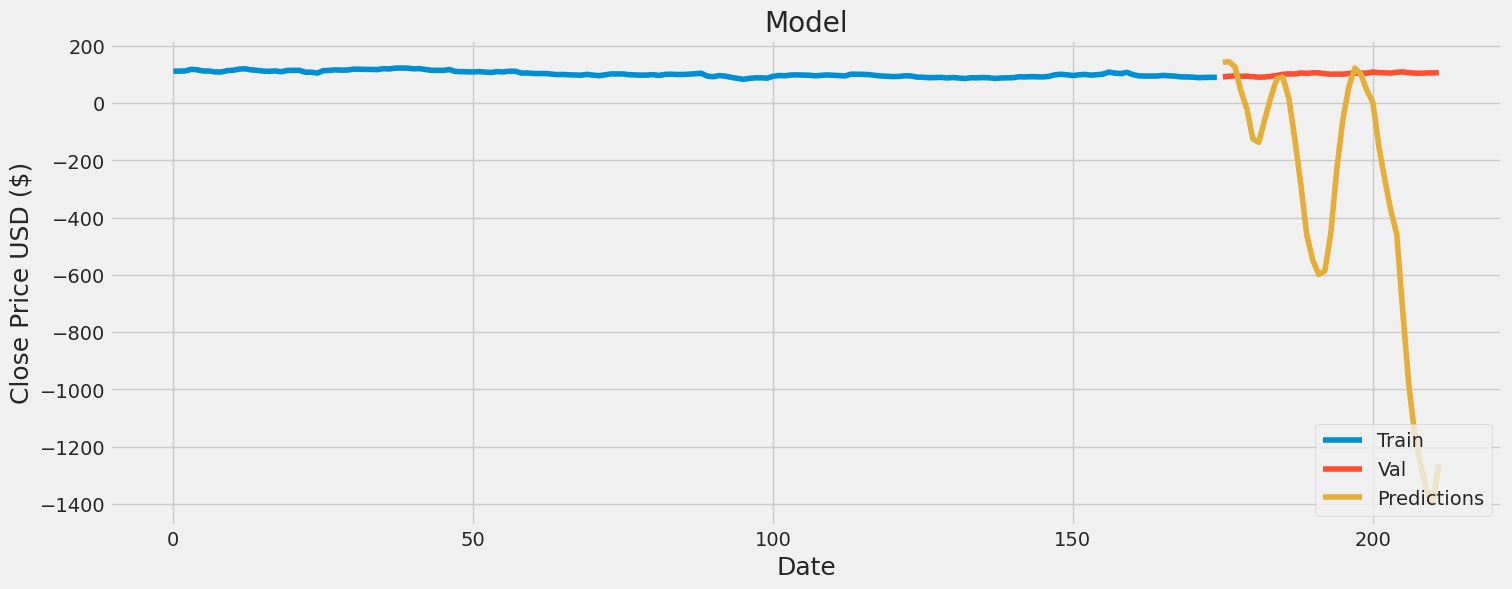

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Support Vector Machine model**

In [ ]:
from sklearn.svm import LinearSVR
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def svr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {"C": params["C"]}
    model = LinearSVR(
        random_state=random_state,
        loss="squared_epsilon_insensitive",
        dual=False,
        **params
)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
svr_model = LinearSVR(
    random_state=42,
    loss="squared_epsilon_insensitive",
    dual=False,
)
svr_model.fit(x_train_tsf_scaled, y_train)

LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=42)

In [ ]:
svr_train_results = get_results(svr_model, x_train_tsf_scaled, y_train)
svr_val_results = get_results(svr_model, x_val_tsf_scaled, y_val)
svr_test_results = get_results(svr_model, x_test_tsf_scaled, y_test)

In [ ]:
print("Train results: ", svr_train_results)
print("Val results: ", svr_val_results)
print("Test results: ", svr_test_results)

Train results:  {'mse': 0.0012242776616695685, 'mae': 0.026806651377087893, 'mape': 0.11910722116683528}
Val results:  {'mse': 0.05454215867255109, 'mae': 0.1992425820822994, 'mape': 0.982260361893557}
Test results:  {'mse': 0.16891731125213996, 'mae': 0.3625199106301609, 'mape': 0.9805012378688333}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(svr_model.predict(x_val_tsf_scaled), 1)
)

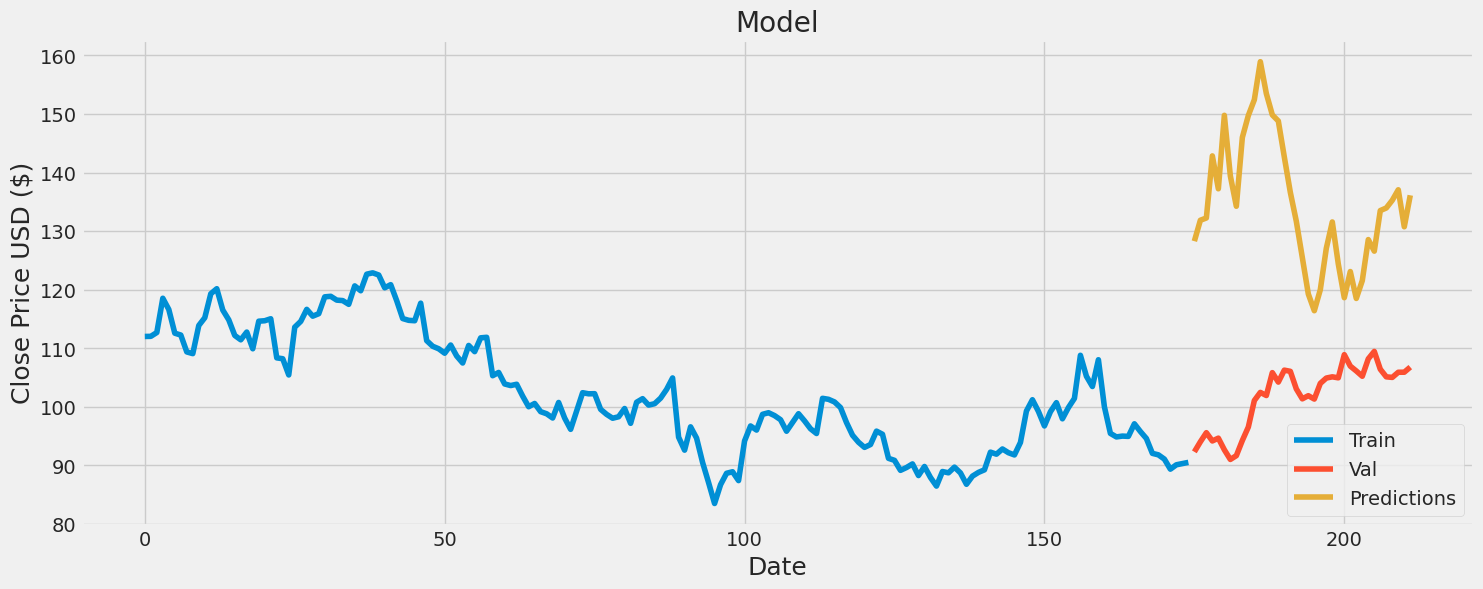

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Decision Tree Regressor model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import scipy
from sklearn.tree import DecisionTreeRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def dtr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "min_samples_leaf": params["min_samples_split"],
}
    model = DecisionTreeRegressor(random_state=random_state, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
from hyperopt.pyll import scope

In [ ]:
space={
    "min_samples_split": scope.int(hp.uniform("min_samples_split", 2, 10)),
    "min_samples_leaf": scope.int(hp.uniform("min_samples_leaf", 1, 10)),
}

In [ ]:
trials = Trials()

In [ ]:
dtr_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
)

In [ ]:
dtr_model.fit(x_train_tsf_scaled, y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=6, min_samples_split=3,
                      random_state=42)

In [ ]:
dtr_train_results = get_results(dtr_model, x_train_tsf_scaled, y_train)
dtr_val_results = get_results(dtr_model, x_val_tsf_scaled, y_val)
dtr_test_results = get_results(dtr_model, x_test_tsf_scaled, y_test)

In [ ]:
print("Train results: ", dtr_train_results)
print("Val results: ", dtr_val_results)
print("Test results: ", dtr_test_results)

Train results:  {'mse': 0.0021605838539914797, 'mae': 0.034222498783994595, 'mape': 0.14790015925046057}
Val results:  {'mse': 0.019542457401249696, 'mae': 0.10871859104385236, 'mape': 0.2821391114061951}
Test results:  {'mse': 0.15441641653271157, 'mae': 0.34220665204120987, 'mape': 0.8362776183294792}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(dtr_model.predict(x_val_tsf_scaled), 1)
)

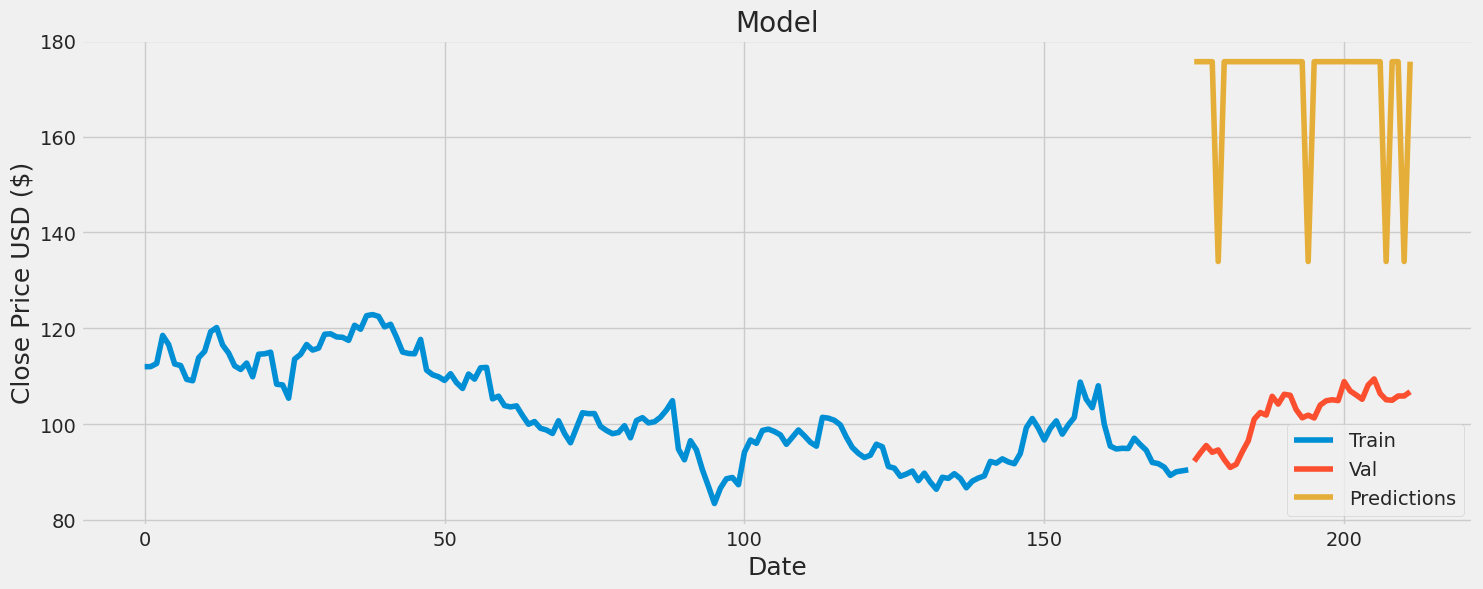

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Random Forest Regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def rf_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
         "min_samples_leaf": params["min_samples_split"],
}
    model = RandomForestRegressor(random_state=random_state, n_jobs=-1, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
    n_jobs=-1,
)
rf_model.fit(x_train_tsf_scaled, y_train)
rf_train_results = get_results(rf_model, x_train_tsf_scaled, y_train)
rf_val_results = get_results(rf_model, x_val_tsf_scaled, y_val)
rf_test_results = get_results(rf_model, x_test_tsf_scaled, y_test)
print("Train results: ", rf_train_results)
print("Val results: ", rf_val_results)
print("Test results: ", rf_test_results)

Train results:  {'mse': 0.0015397272576702678, 'mae': 0.029841300281329645, 'mape': 0.12273270625278862}
Val results:  {'mse': 0.024765372321934077, 'mae': 0.14229300257490368, 'mape': 0.46643705555183074}
Test results:  {'mse': 0.2359311546692481, 'mae': 0.44770018245227144, 'mape': 1.3664489939065754}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(rf_model.predict(x_val_tsf_scaled), 1)
)

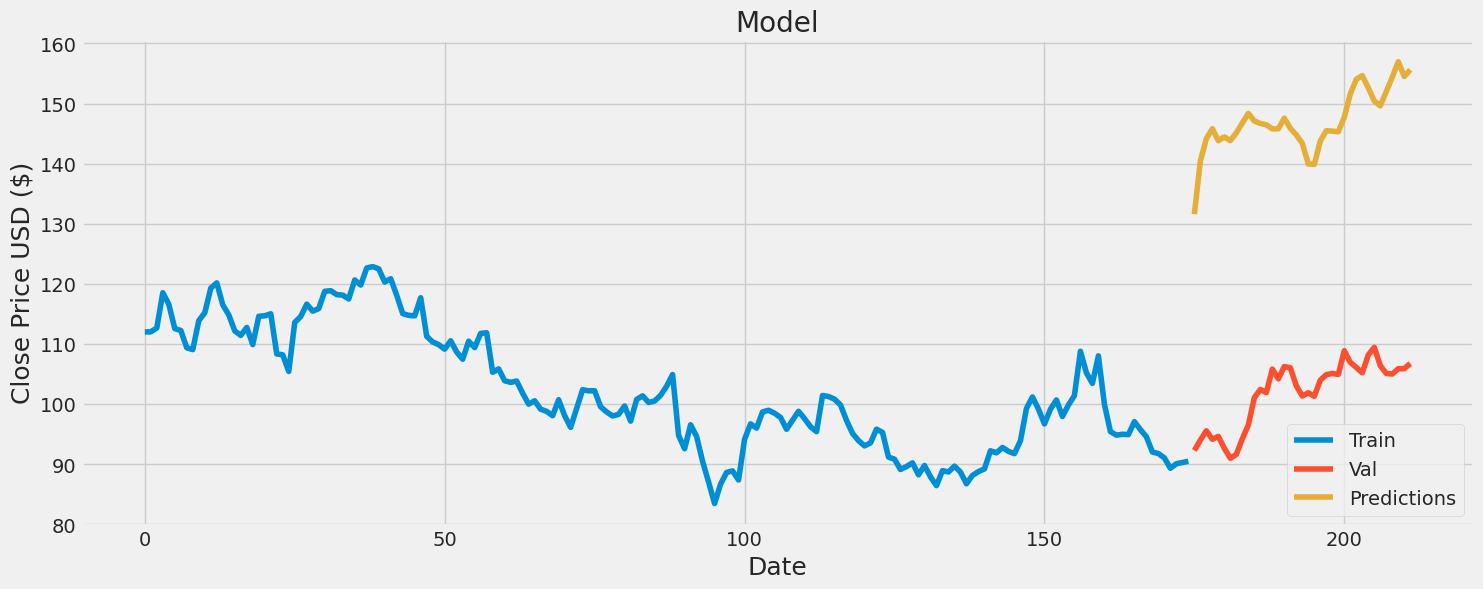

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Gradient Boosting Regression**

In [ ]:
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def lgbm_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
          "learning_rate": params["learning_rate"],
          "n_estimators": params["n_estimators"],
          "colsample_bytree": params["colsample_bytree"],
          "subsample": params["subsample"],
}
    model = LGBMRegressor(random_state=random_state, n_jobs=-1, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
lgbm_model = LGBMRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    n_jobs=-1,
)

In [ ]:
lgbm_model.fit(x_train_tsf_scaled, y_train)
lgbm_train_results = get_results(lgbm_model, x_train_tsf_scaled, y_train)
lgbm_val_results = get_results(lgbm_model, x_val_tsf_scaled, y_val)
lgbm_test_results = get_results(lgbm_model, x_test_tsf_scaled, y_test)
print("Train results: ", lgbm_train_results)
print("Val results: ", lgbm_val_results)
print("Test results: ", lgbm_test_results)

Train results:  {'mse': 1.025741134284153e-06, 'mae': 0.0007893778380418628, 'mape': 0.012133636262546005}
Val results:  {'mse': 0.0304249369892778, 'mae': 0.16123367377037612, 'mape': 0.5521920485297647}
Test results:  {'mse': 0.23098537085448043, 'mae': 0.4392586566633915, 'mape': 1.335389704884844}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lgbm_model.predict(x_val_tsf_scaled), 1)
)

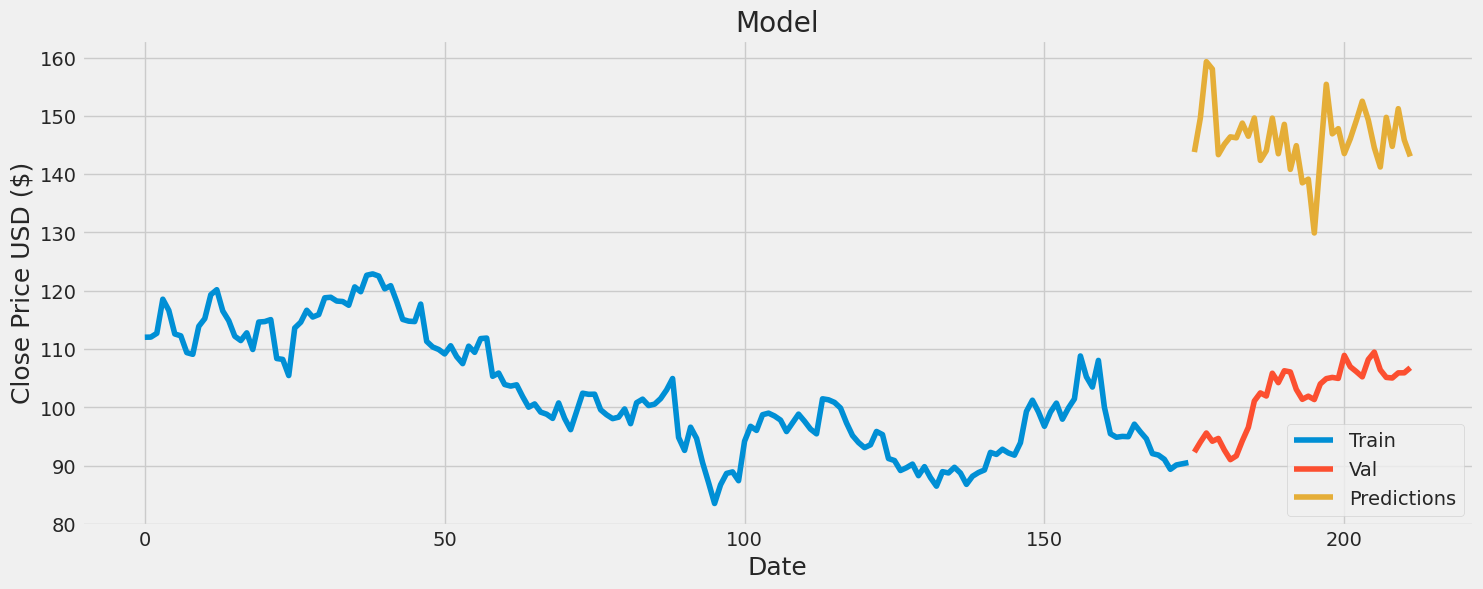

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **For Microsoft stocks**

In [ ]:
data = MSFT_data.filter(["Close"])

In [ ]:
dataset = data.values

In [ ]:
dataset.shape

(250, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * 0.70))
dataset_len = len(dataset)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_len), :]

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_data)):
    x_val.append(val_data[i - 60 : i, 0])

In [ ]:
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (115, 60, 1)
x_val shape:  (37, 60, 1)
x_test shape:  (38, 60, 1)

y_train shape:  (115,)
y_val shape:  (37, 1)
y_test shape:  (38, 1)


In [ ]:
y_val_reshaped=y_val.reshape(37)
y_test_reshaped=y_test.reshape(38)

In [ ]:
def get_results(model, X, y):
    results = {}
    predictions = model.predict(X)
    results["mse"] = mean_squared_error(predictions, y)
    results["mae"] = mean_absolute_error(predictions, y)
    results["mape"] = mean_absolute_percentage_error(predictions, y)
    return results

# **Using the LSTM model for prediction**

In [ ]:
lstm_model = Sequential()
lstm_model.add(
    LSTM(
       128,
       return_sequences=True,
      input_shape=(
       x_train.shape[1],
       1,
     ),
   )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=100)

Epoch 1/100
115/115 [==============================] - 9s 48ms/step - loss: 0.0132 - val_loss: 0.0275
Epoch 2/100
115/115 [==============================] - 5s 46ms/step - loss: 0.0065 - val_loss: 0.0206
Epoch 3/100
115/115 [==============================] - 5s 44ms/step - loss: 0.0056 - val_loss: 0.0186
Epoch 4/100
115/115 [==============================] - 4s 37ms/step - loss: 0.0048 - val_loss: 0.0213
Epoch 5/100
115/115 [==============================] - 5s 48ms/step - loss: 0.0046 - val_loss: 0.0230
Epoch 6/100
115/115 [==============================] - 5s 43ms/step - loss: 0.0038 - val_loss: 0.0330
Epoch 7/100
115/115 [==============================] - 4s 37ms/step - loss: 0.0042 - val_loss: 0.0132
Epoch 8/100
115/115 [==============================] - 5s 48ms/step - loss: 0.0037 - val_loss: 0.0162
Epoch 9/100
115/115 [==============================] - 5s 43ms/step - loss: 0.0036 - val_loss: 0.0203
Epoch 10/100
115/115 [==============================] - 4s 38ms/step - loss: 0.003

In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)
print("Train results: ", lstm_train_results)
print("Val results: ", lstm_val_results)
print("Test results: ", lstm_test_results)

2/2 [==============================] - 0s 27ms/step
Train results:  {'mse': 0.0016434711234749907, 'mae': 0.03277451517268268, 'mape': 0.18835270878433252}
Val results:  {'mse': 0.016503913052677312, 'mae': 0.11985780633928632, 'mape': 0.4021771780152583}
Test results:  {'mse': 0.06393018539015381, 'mae': 0.24895123469192074, 'mape': 0.485348379316857}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

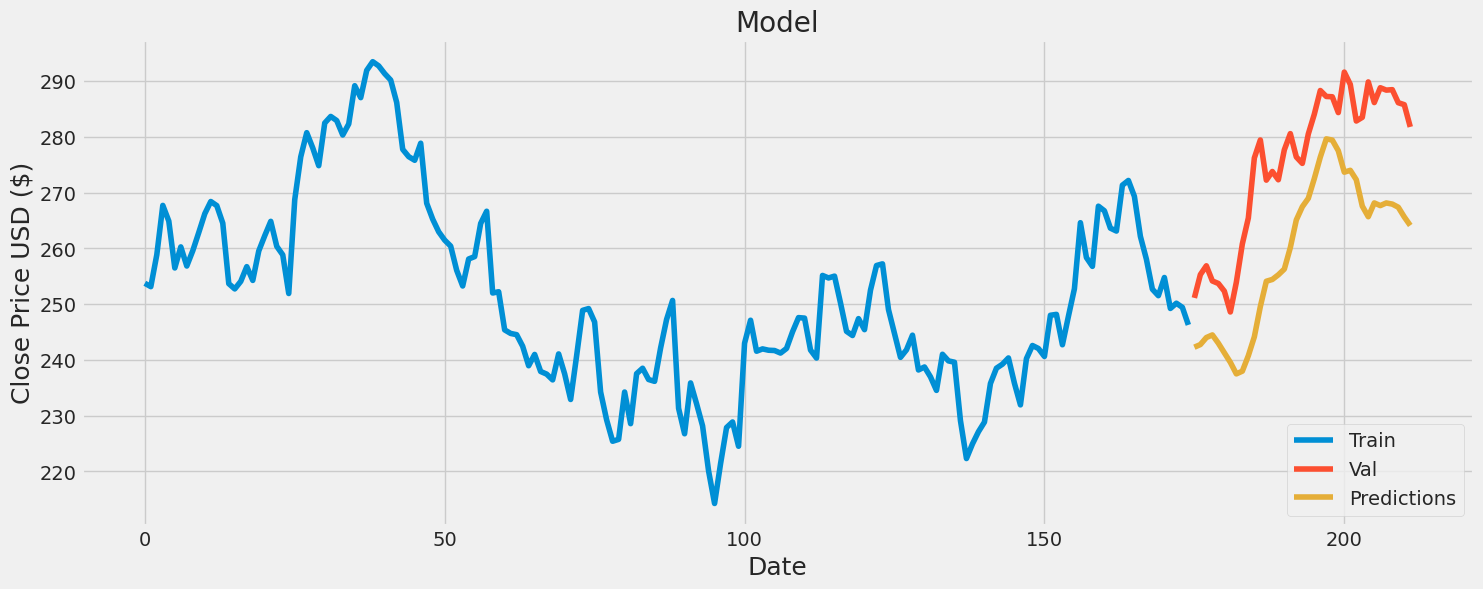

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions_LSTM"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions_LSTM"]])
plt.legend(["Train", "Val", "Predictions_LSTM"], loc="lower right")
plt.show()

# **Using ARIMA model**

In [ ]:
def get_results_arima(predictions, actual):
    results = {}
    results["mse"] = mean_squared_error(predictions, actual)
    results["mae"] = mean_absolute_error(predictions, actual)
    results["mape"] = mean_absolute_percentage_error(predictions, actual)
    return results

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
  model = ARIMA(train_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  train_predictions.append(output[0])
  train_history.append(y_train[t])

arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                       'mae': mean_absolute_error(train_predictions, y_train),
                       'mape': mean_absolute_percentage_error(train_predictions, y_train)}

100%|██████████| 115/115 [00:24<00:00,  4.62it/s]


In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
  model = ARIMA(val_history, order=(5,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  val_predictions.append(output[0])
  val_history.append(y_val[t][0])

100%|██████████| 37/37 [00:07<00:00,  4.99it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
    model = ARIMA(test_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    test_predictions.append(output[0])
    test_history.append(y_test[t][0])

100%|██████████| 38/38 [00:09<00:00,  4.00it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.0016917593989599733, 'mae': 0.030936558999473337, 'mape': 0.20861948872453567}
Val results:  {'mse': 0.0009859305064336035, 'mae': 0.026049383897405166, 'mape': 0.06377658619973244}
Test results:  {'mse': 0.001689235226810012, 'mae': 0.028869416092666998, 'mape': 0.04121569705296191}


# **Visualising the data**

In [ ]:
test_predictions = np.array(test_predictions)

In [ ]:
x_test_reshaped = np.squeeze(x_test)

ValueError: ignored

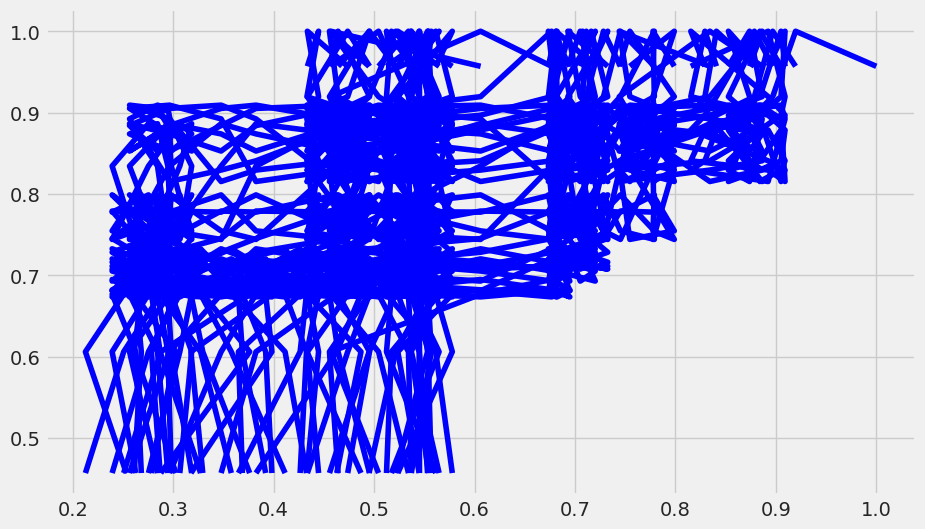

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test_reshaped, y_test, label='Testing Data', color='blue')
plt.plot(x_test_reshaped, test_predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **Modeling Machine learning based Regression models**

In [ ]:
import tsfel
from tsfel.feature_extraction import features

In [ ]:
cfg = tsfel.get_features_by_domain()

In [ ]:
x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)
x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)
x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)

*** Feature extraction started ***


<ipython-input-289-3203f34e5bdc>:1: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-289-3203f34e5bdc>:2: UserWarning: Using default sampling frequency set in configuration file.
  x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-289-3203f34e5bdc>:3: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)



*** Feature extraction finished ***


In [ ]:
x_train_tsf

0_Absolute energy  0_Area under the curve  0_Autocorrelation  0_Centroid  \
0            10.263572                0.238853          10.263572    0.315636   
1            10.230619                0.238507          10.230619    0.309825   
2            10.198133                0.237690          10.198133    0.303864   
3            10.138199                0.236297          10.138199    0.298688   
4            10.023124                0.234592          10.023124    0.294774   
..                 ...                     ...                ...         ...   
110           4.044584                0.144136           4.044584    0.347661   
111           4.074556                0.144772           4.074556    0.348599   
112           4.100572                0.145590           4.100572    0.346374   
113           4.134585                0.145736           4.134585    0.343970   
114           4.110301                0.145353           4.110301    0.346081   

     0_ECDF Percentile Count_0  0_ECDF Percentile Count_1  \
0                         12.0                       48.0   
1                         12.0                       48.0   
2                         12.0                       48.0   
3                         12.0                       48.0   
4                         12.0                       48.0   
..                         ...                        ...   
110                       12.0                       48.0   
111                       12.0                       48.0   
112                       12.0                       48.0   
113                       12.0                       48.0   
114                       12.0                       48.0   

     0_ECDF Percentile_0  0_ECDF Percentile_1  0_ECDF_0  0_ECDF_1  ...  \
0               0.315502              0.49675  0.016667  0.033333  ...   
1               0.315502              0.49675  0.016667  0.033333  ...   
2               0.315502              0.49675  0.016667  0.033333  ...   
3               0.312365              0.49675  0.016667  0.033333  ...   
4               0.298842              0.49675  0.016667  0.033333  ...   
..                   ...                  ...       ...       ...  ...   
110             0.181248              0.31879  0.016667  0.033333  ...   
111             0.181248              0.31879  0.016667  0.033333  ...   
112             0.181248              0.31879  0.016667  0.033333  ...   
113             0.181248              0.31879  0.016667  0.033333  ...   
114             0.181248              0.31879  0.016667  0.033333  ...   

     0_Wavelet variance_0  0_Wavelet variance_1  0_Wavelet variance_2  \
0                0.001821              0.008404              0.013535   
1                0.001960              0.008256              0.013626   
2                0.002400              0.007405              0.013037   
3                0.002515              0.006196              0.012259   
4                0.002126              0.005305              0.012146   
..                    ...                   ...                   ...   
110              0.001789              0.005767              0.013235   
111              0.001753              0.005937              0.011917   
112              0.002178              0.006218              0.010549   
113              0.002207              0.006193              0.009187   
114              0.002314              0.005629              0.008104   

     0_Wavelet variance_3  0_Wavelet variance_4  0_Wavelet variance_5  \
0                0.020382              0.031083              0.043560   
1                0.021647              0.032231              0.042782   
2                0.022454              0.032967              0.041784   
3                0.022972              0.033210              0.040302   
4                0.023468              0.032895              0.038201   
..                    ...                   ...                   ...   
110              0.026

In [ ]:
print("Total Number of columns generated are: ",x_train_tsf.shape[1])

Total Number of columns generated are:  164


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_tsf_scaled = scaler.fit_transform(x_train_tsf)
x_val_tsf_scaled = scaler.transform(x_val_tsf)
x_test_tsf_scaled = scaler.transform(x_test_tsf)

# **Using Linear Regression models for prediction**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lnr_model = LinearRegression().fit(x_train_tsf_scaled, y_train)
lnr_train_results = get_results(lnr_model, x_train_tsf_scaled, y_train)
lnr_val_results = get_results(lnr_model, x_val_tsf_scaled, y_val)
lnr_test_results = get_results(lnr_model, x_test_tsf_scaled, y_test)
print("Train results: ", lnr_train_results)
print("Val results: ", lnr_val_results)
print("Test results: ", lnr_test_results)

Train results:  {'mse': 2.946236851361929e-28, 'mae': 1.4795893978613175e-14, 'mape': 0.00869565217399149}
Val results:  {'mse': 7.756287104951244, 'mae': 1.9684039256763743, 'mape': 1.0023957473030414}
Test results:  {'mse': 385.73759402448036, 'mae': 16.796494540579822, 'mape': 1.0889264274061523}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lnr_model.predict(x_val_tsf_scaled), 1)
)


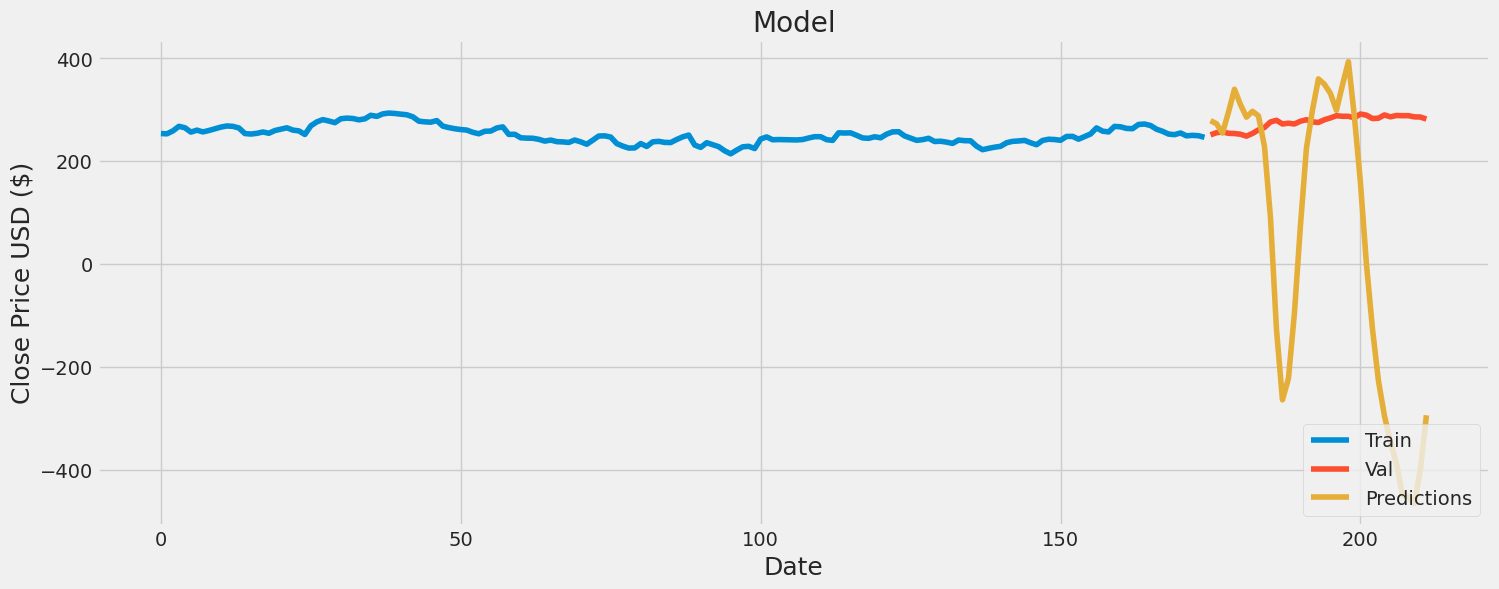

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Support Vector Regression model**

In [ ]:
from sklearn.svm import LinearSVR
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def svr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {"C": params["C"]}
    model = LinearSVR(
    random_state=42,
    loss="squared epsilon insensitive",
    dual=False
    **params
    )
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
svr_model = LinearSVR(
    random_state=42,
    loss="squared_epsilon_insensitive",
    dual=False,
)
svr_model.fit(x_train_tsf_scaled, y_train)

LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=42)

In [ ]:
svr_train_results = get_results(svr_model, x_train_tsf_scaled, y_train)
svr_val_results = get_results(svr_model, x_val_tsf_scaled, y_val)
svr_test_results = get_results(svr_model, x_test_tsf_scaled, y_test)
print("Train results: ", svr_train_results)
print("Val results: ", svr_val_results)
print("Test results: ", svr_test_results)

Train results:  {'mse': 0.0007109405536847984, 'mae': 0.021795962570849068, 'mape': 0.12401408277889636}
Val results:  {'mse': 0.049373025897746746, 'mae': 0.19621180393056362, 'mape': 0.8399145214596855}
Test results:  {'mse': 0.46321727579936034, 'mae': 0.6741583364393998, 'mape': 8.110089874068308}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(svr_model.predict(x_val_tsf_scaled), 1)
)

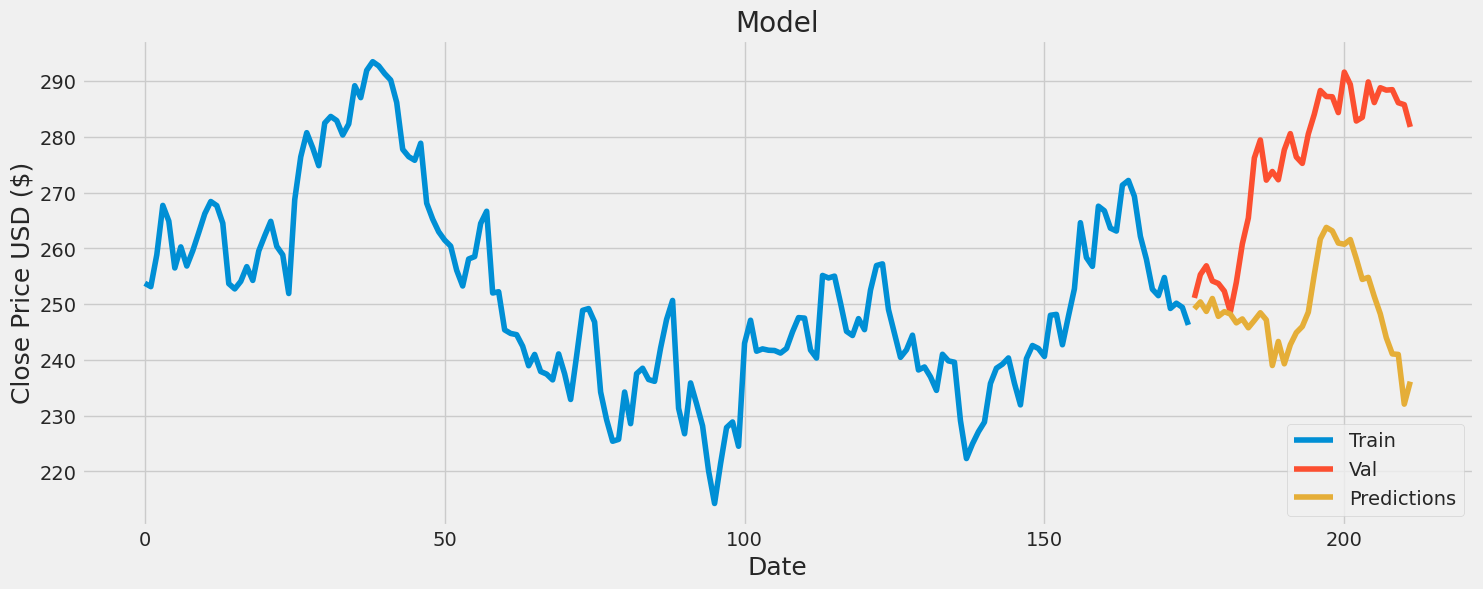

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using the Decision Tree Regressor model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import scipy
from sklearn.tree import DecisionTreeRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def dtr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "min_samples_leaf": params["min_samples_split"],
    }
    model = DecisionTreeRegressor(random_state=random_state, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
dtr_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
)

In [ ]:
dtr_model.fit(x_train_tsf_scaled, y_train)
dtr_train_results = get_results(dtr_model, x_train_tsf_scaled, y_train)
dtr_val_results = get_results(dtr_model, x_val_tsf_scaled, y_val)
dtr_test_results = get_results(dtr_model, x_test_tsf_scaled, y_test)
print("Train results: ", dtr_train_results)
print("Val results: ", dtr_val_results)
print("Test results: ", dtr_test_results)

Train results:  {'mse': 0.0006119049712588232, 'mae': 0.0187829263450373, 'mape': 0.11525882336347366}
Val results:  {'mse': 0.10895939488738914, 'mae': 0.281230048632009, 'mape': 2.696550202570718}
Test results:  {'mse': 0.4860629396115533, 'mae': 0.6887093914082365, 'mape': 7.540313471120639}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(dtr_model.predict(x_val_tsf_scaled), 1)
)

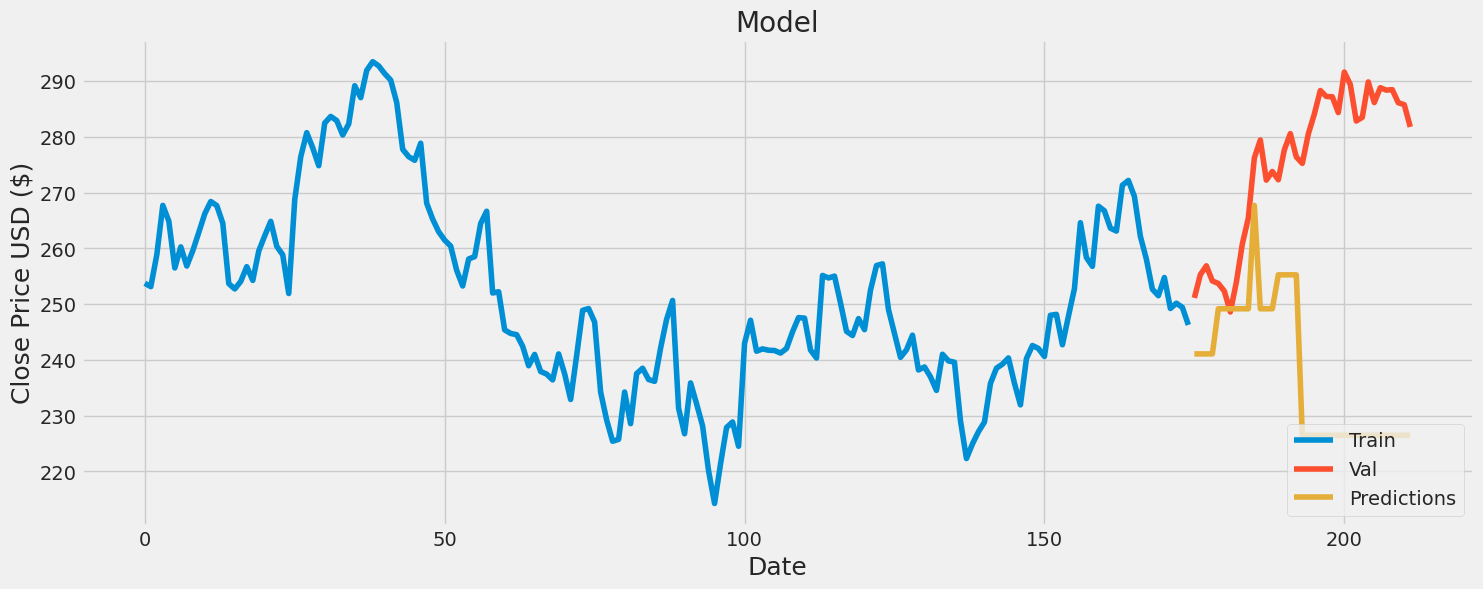

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Random Forest Regressor model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def rf_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "n_estimators": params["n_estimators"],
        "max_depth": params["max_depth"],
        "min_samples_split": params["min_samples_split"],
        "min_samples_leaf": params["min_samples_split"],
}
    model = RandomForestRegressor(random_state=random_state, n_jobs=-1, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
    n_jobs=-1,
)
rf_model.fit(x_train_tsf_scaled, y_train)
rf_train_results = get_results(rf_model, x_train_tsf_scaled, y_train)
rf_val_results = get_results(rf_model, x_val_tsf_scaled, y_val)
rf_test_results = get_results(rf_model, x_test_tsf_scaled, y_test)
print("Train results: ", rf_train_results)
print("Val results: ", rf_val_results)
print("Test results: ", rf_test_results)

Train results:  {'mse': 0.0007016195486066032, 'mae': 0.02087351461241335, 'mape': 0.11531566411500775}
Val results:  {'mse': 0.05565831500458763, 'mae': 0.20956020131088707, 'mape': 0.8696259613315146}
Test results:  {'mse': 0.3721075852516041, 'mae': 0.5994464205033514, 'mape': 3.3424394575941263}


# **Visualising the Data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(rf_model.predict(x_val_tsf_scaled), 1)
)

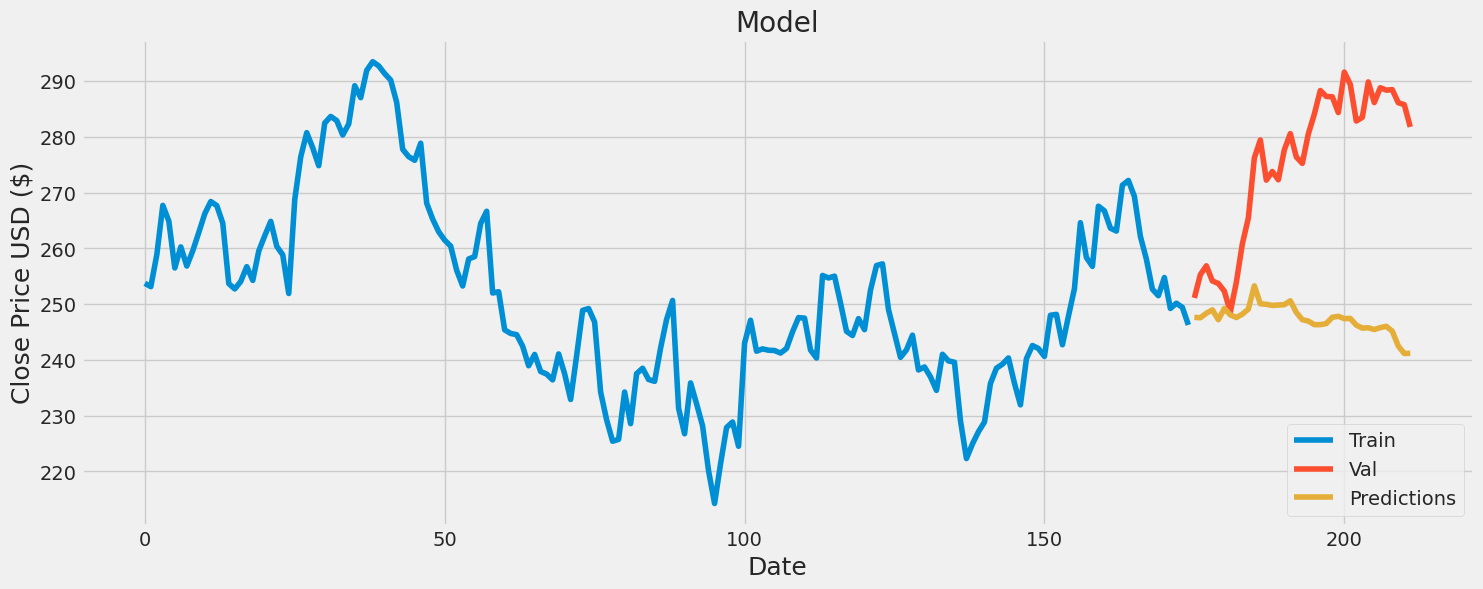

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Gradient Boosting Regressor model**

In [ ]:
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def lgbm_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "learning_rate": params["learning_rate"],
        "n_estimators": params["n_estimators"],
        "colsample_bytree": params["colsample_bytree"],
        "subsample": params["subsample"],
}
    model = LGBMRegressor(random_state=random_state, n_jobs=-1, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
lgbm_model = LGBMRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    n_jobs=-1,
)

In [ ]:
lgbm_model.fit(x_train_tsf_scaled, y_train)
lgbm_train_results = get_results(lgbm_model, x_train_tsf_scaled, y_train)
lgbm_val_results = get_results(lgbm_model, x_val_tsf_scaled, y_val)
lgbm_test_results = get_results(lgbm_model, x_test_tsf_scaled, y_test)
print("Train results: ", lgbm_train_results)
print("Val results: ", lgbm_val_results)
print("Test results: ", lgbm_test_results)

Train results:  {'mse': 4.3153696670946227e-07, 'mae': 0.0005188103356739961, 'mape': 0.011543878457175902}
Val results:  {'mse': 0.045383896933325354, 'mae': 0.18698894844036487, 'mape': 0.7065095775050709}
Test results:  {'mse': 0.3242639076281795, 'mae': 0.5589733043429129, 'mape': 2.5479641111614373}


# **Visualising the Data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lgbm_model.predict(x_val_tsf_scaled), 1)
)

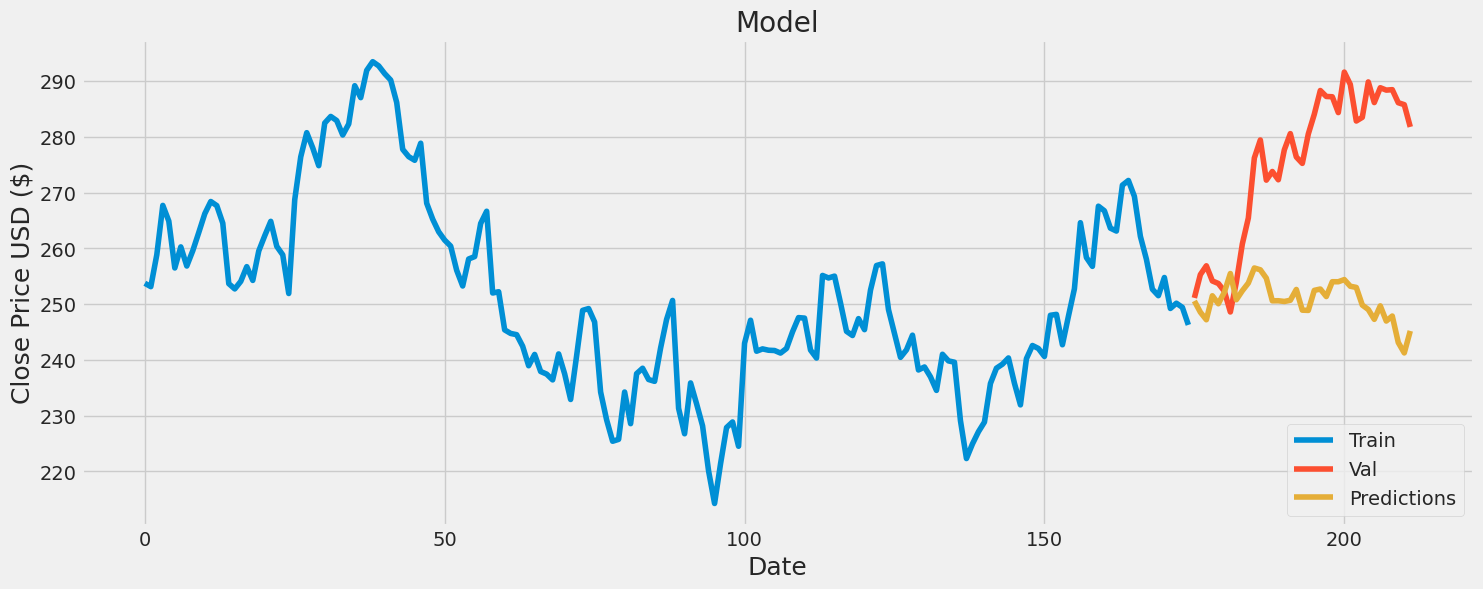

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **For Amazon stocks**

In [ ]:
data = AMZN_data.filter(["Close"])
dataset = data.values
dataset.shape

(871, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
scaled_dataset = data_scaler.fit_transform(dataset)

training_data_len = int(np.ceil(len(dataset) * 0.70))
dataset_len = len(dataset)

In [ ]:
train_data = scaled_dataset[0 : int(training_data_len), :]

In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
val_data = scaled_dataset[training_data_len - 60 : -int(np.ceil(dataset_len * 0.15)), :]

In [ ]:
x_val = []
y_val = scaled_dataset[training_data_len : -int(np.ceil(dataset_len * 0.15)), :]
for i in range(60, len(val_data)):
    x_val.append(val_data[i - 60 : i, 0])

In [ ]:
x_val = np.array(x_val)

In [ ]:
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
test_data = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) - 60 :, :]

In [ ]:
x_test = []
y_test = scaled_dataset[-int(np.ceil(dataset_len * 0.15)) :, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60 : i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("x_train shape: ", x_train.shape)
print("x_val shape: ", x_val.shape)
print("x_test shape: ", x_test.shape)
print("\ny_train shape: ", y_train.shape)
print("y_val shape: ", y_val.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (550, 60, 1)
x_val shape:  (130, 60, 1)
x_test shape:  (131, 60, 1)

y_train shape:  (550,)
y_val shape:  (130, 1)
y_test shape:  (131, 1)


In [ ]:
def get_results(model, X, y):
    results = {}
    predictions = model.predict(X)
    results["mse"] = mean_squared_error(predictions, y)
    results["mae"] = mean_absolute_error(predictions, y)
    results["mape"] = mean_absolute_percentage_error(predictions, y)
    return results

# **Using LSTM model for predictions**

In [ ]:
lstm_model = Sequential()
lstm_model.add(
    LSTM(
        128,
        return_sequences=True,
        input_shape=(
        x_train.shape[1],
        1,
      ),
    )
)
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

In [ ]:
lstm_model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=1)

550/550 [==============================] - 28s 45ms/step - loss: 0.0195 - val_loss: 0.0103


In [ ]:
lstm_train_results = get_results(lstm_model, x_train, y_train)
lstm_val_results = get_results(lstm_model, x_val, y_val)
lstm_test_results = get_results(lstm_model, x_test, y_test)
print("Train results: ", lstm_train_results)
print("Val results: ", lstm_val_results)
print("Test results: ", lstm_test_results)

5/5 [==============================] - 0s 33ms/step
Train results:  {'mse': 0.005960522727526982, 'mae': 0.05873094837838103, 'mape': 0.09442083033537774}
Val results:  {'mse': 0.010259865884236653, 'mae': 0.08512852733880673, 'mape': 0.24807880727916934}
Test results:  {'mse': 0.005004773086083133, 'mae': 0.05724208307842731, 'mape': 0.28334507546669735}


# **Visualising the Data**

In [ ]:
pd.options.mode.chained_assignment = None

5/5 [==============================] - 0s 30ms/step


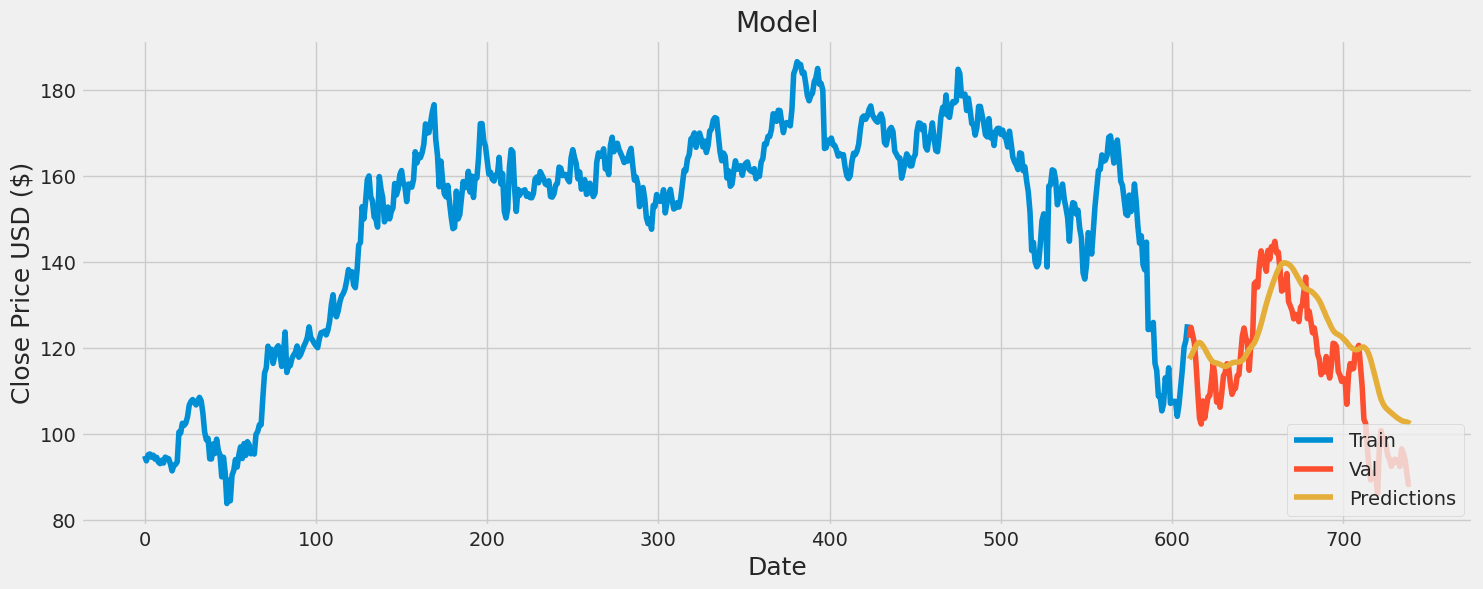

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(lstm_model.predict(x_val))
# Visualize the data
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using ARIMA model**

In [ ]:
def get_results_arima(predictions, actual):
    results = {}
    results["mse"] = mean_squared_error(predictions, actual)
    results["mae"] = mean_absolute_error(predictions, actual)
    results["mape"] = mean_absolute_percentage_error(predictions, actual)
    return results

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
train_predictions = []
x_train_arima = np.squeeze(x_train)
train_history = list(x_train_arima[0])
for t in tqdm(range(x_train.shape[0])):
    model = ARIMA(train_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    train_predictions.append(output[0])
    train_history.append(y_train[t])

100%|██████████| 550/550 [02:17<00:00,  3.99it/s]


In [ ]:
arima_train_results = {'mse': mean_squared_error(train_predictions, y_train),
                      'mae': mean_absolute_error(train_predictions, y_train),
                      'mape': mean_absolute_percentage_error(train_predictions, y_train)}

In [ ]:
val_predictions = []
x_val_arima = np.squeeze(x_val)
val_history = train_history.copy()

In [ ]:
for t in tqdm(range(len(x_val))):
    model = ARIMA(val_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    val_predictions.append(output[0])
    val_history.append(y_val[t][0])

100%|██████████| 130/130 [00:43<00:00,  3.02it/s]


In [ ]:
arima_val_results = {'mse': mean_squared_error(val_predictions, y_val),
                     'mae': mean_absolute_error(val_predictions, y_val),
                     'mape': mean_absolute_percentage_error(val_predictions, y_val)}

In [ ]:
test_predictions = []
x_test_arima = np.squeeze(x_test)
test_history = val_history.copy()

In [ ]:
for t in tqdm(range(len(x_test))):
    model = ARIMA(test_history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    test_predictions.append(output[0])
    test_history.append(y_test[t][0])

100%|██████████| 131/131 [01:03<00:00,  2.08it/s]


In [ ]:
arima_test_results = {'mse': mean_squared_error(test_predictions, y_test),
                      'mae': mean_absolute_error(test_predictions, y_test),
                      'mape': mean_absolute_percentage_error(test_predictions, y_test)}

In [ ]:
print("Train results: ", arima_train_results)
print("Val results: ", arima_val_results)
print("Test results: ", arima_test_results)

Train results:  {'mse': 0.0010410155150081164, 'mae': 0.0234218153161858, 'mape': 0.03872368509018982}
Val results:  {'mse': 0.0011183265414017615, 'mae': 0.026080558199326444, 'mape': 0.11207020686889897}
Test results:  {'mse': 0.0004943523770526203, 'mae': 0.017427012451777267, 'mape': 0.23574727797287234}


# **Visualising the data**

In [ ]:
test_predictions = np.array(test_predictions)

In [ ]:
x_test_reshaped = np.squeeze(x_test)

In [ ]:
x_test_reshaped.shape

(38, 60)

ValueError: ignored

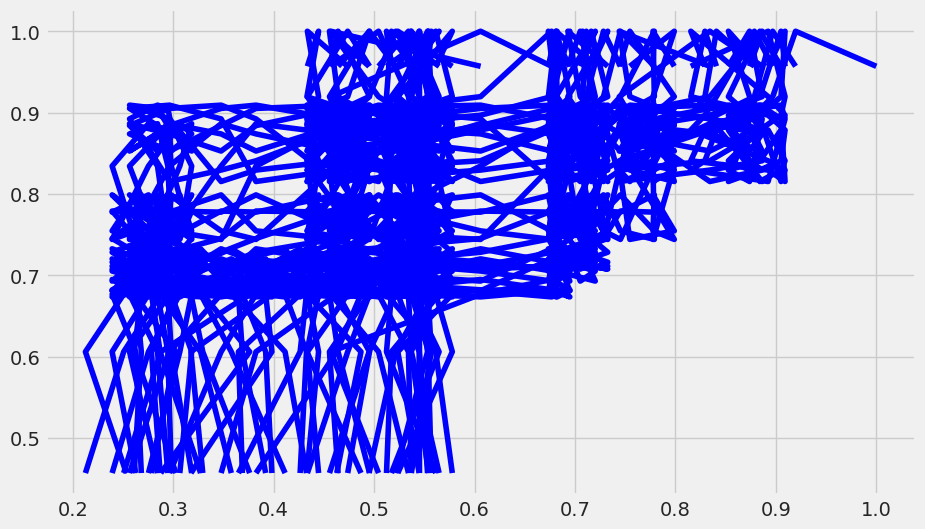

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test_reshaped, y_test, label='Testing Data', color='blue')
plt.plot(x_test_reshaped, test_predictions, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **Using Machine Learning based Regression models**

In [ ]:
import tsfel
from tsfel.feature_extraction import features
cfg = tsfel.get_features_by_domain()

x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)
x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)
x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)

*** Feature extraction started ***


<ipython-input-382-38341d408f10>:5: UserWarning: Using default sampling frequency set in configuration file.
  x_train_tsf = tsfel.time_series_features_extractor(cfg, x_train)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-382-38341d408f10>:6: UserWarning: Using default sampling frequency set in configuration file.
  x_val_tsf = tsfel.time_series_features_extractor(cfg, x_val)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-382-38341d408f10>:7: UserWarning: Using default sampling frequency set in configuration file.
  x_test_tsf = tsfel.time_series_features_extractor(cfg, x_test)



*** Feature extraction finished ***


In [ ]:
x_train_tsf

0_Absolute energy  0_Area under the curve  0_Autocorrelation  0_Centroid  \
0             1.398228                0.084280           1.398228    0.289560   
1             1.407079                0.084498           1.407079    0.288163   
2             1.416479                0.084822           1.416479    0.285725   
3             1.417069                0.084936           1.417069    0.282706   
4             1.418577                0.085002           1.418577    0.280092   
..                 ...                     ...                ...         ...   
545          21.337950                0.332427          21.337950    0.223410   
546          20.966427                0.328508          20.966427    0.219601   
547          20.669716                0.325295          20.669716    0.215691   
548          20.432821                0.323016          20.432821    0.212136   
549          20.295581                0.321509          20.295581    0.207852   

     0_ECDF Percentile Count_0  0_ECDF Percentile Count_1  \
0                         12.0                       48.0   
1                         12.0                       48.0   
2                         12.0                       48.0   
3                         12.0                       48.0   
4                         12.0                       48.0   
..                         ...                        ...   
545                       12.0                       48.0   
546                       12.0                       48.0   
547                       12.0                       48.0   
548                       12.0                       48.0   
549                       12.0                       48.0   

     0_ECDF Percentile_0  0_ECDF Percentile_1  0_ECDF_0  0_ECDF_1  ...  \
0               0.107513             0.192586  0.016667  0.033333  ...   
1               0.107513             0.192586  0.016667  0.033333  ...   
2               0.107513             0.192586  0.016667  0.033333  ...   
3               0.107513             0.192586  0.016667  0.033333  ...   
4               0.107513             0.192586  0.016667  0.033333  ...   
..                   ...                  ...       ...       ...  ...   
545             0.298185             0.758283  0.016667  0.033333  ...   
546             0.279307             0.758283  0.016667  0.033333  ...   
547             0.279307             0.758283  0.016667  0.033333  ...   
548             0.279307             0.758283  0.016667  0.033333  ...   
549             0.279307             0.758283  0.016667  0.033333  ...   

     0_Wavelet variance_0  0_Wavelet variance_1  0_Wavelet variance_2  \
0                0.000485              0.002230              0.005636   
1                0.000488              0.002214              0.005727   
2                0.000549              0.002211              0.005704   
3                0.000512              0.002180              0.005588   
4                0.000468              0.002092              0.005408   
..                    ...                   ...                   ...   
545              0.004793              0.011366              0.017749   
546              0.004677              0.008768              0.014446   
547              0.003976              0.007990              0.013450   
548              0.003461              0.009252              0.014793   
549              0.003826              0.011001              0.017638   

     0_Wavelet variance_3  0_Wavelet variance_4  0_Wavelet variance_5  \
0                0.009261              0.013067              0.016271   
1                0.009875              0.013928              0.017055   
2                0.010276              0.014662              0.017902   
3                0.010387              0.015027              0.018485   
4                0.010294              0.015190              0.019054   
..                    ...                   ...                   ...   
545              0.023

In [ ]:
print("Total Number of columns generated are: ",x_train_tsf.shape[1])

Total Number of columns generated are:  164


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_tsf_scaled = scaler.fit_transform(x_train_tsf)
x_val_tsf_scaled = scaler.transform(x_val_tsf)
x_test_tsf_scaled = scaler.transform(x_test_tsf)

# **Using Linear Regression for prediction**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lnr_model = LinearRegression().fit(x_train_tsf_scaled, y_train)

In [ ]:
lnr_train_results = get_results(lnr_model, x_train_tsf_scaled, y_train)
lnr_val_results = get_results(lnr_model, x_val_tsf_scaled, y_val)
lnr_test_results = get_results(lnr_model, x_test_tsf_scaled, y_test)
print("Train results: ", lnr_train_results)
print("Val results: ", lnr_val_results)
print("Test results: ", lnr_test_results)

Train results:  {'mse': 0.000591486627742115, 'mae': 0.018321587496013234, 'mape': 0.028746316532705683}
Val results:  {'mse': 0.2134522188135626, 'mae': 0.3623550129006059, 'mape': 41.1098930132899}
Test results:  {'mse': 0.22751353705138913, 'mae': 0.3697339030132718, 'mape': 0.7153481369429181}


### **Visualising the Data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lnr_model.predict(x_val_tsf_scaled), 1)
)

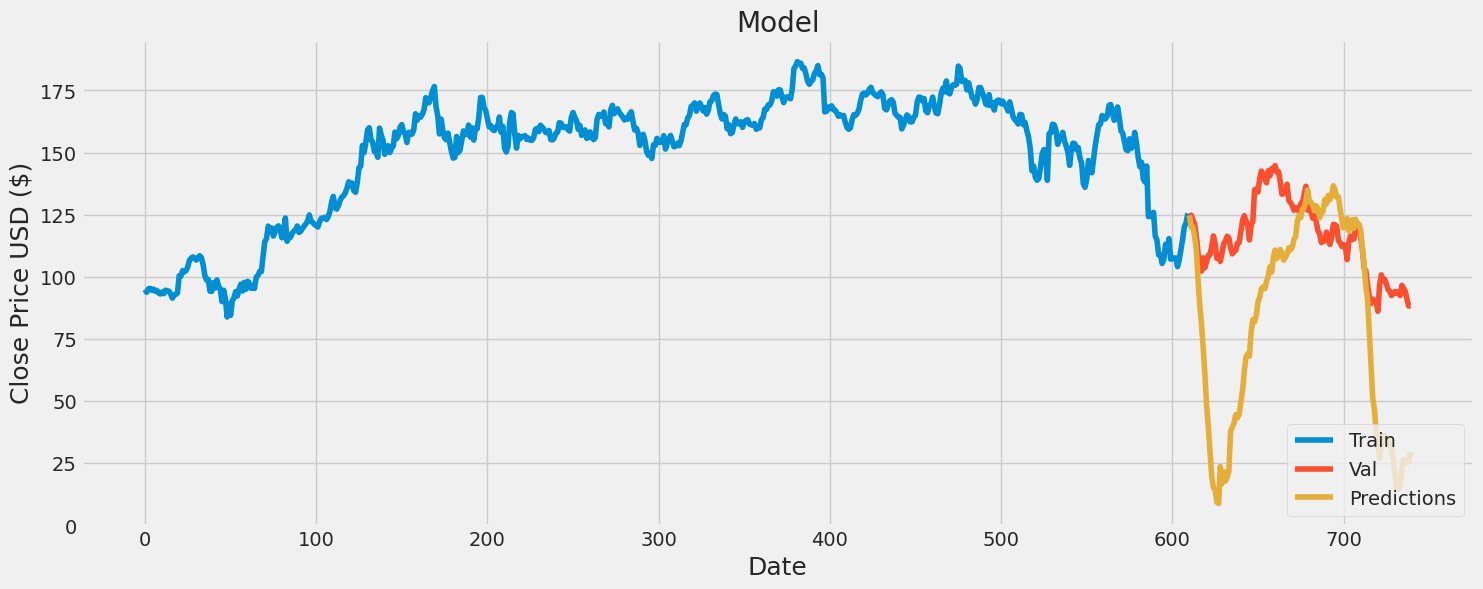

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Support Vector Machines model**

In [ ]:
from sklearn.svm import LinearSVR
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def svr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {"C": params["C"]}
    model = LinearSVR(
         random_state=random_state,
         loss="squared_epsilon_insensitive",
         dual=False,
         **params
)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
svr_model = LinearSVR(
    random_state=42,
    loss="squared_epsilon_insensitive",
    dual=False,
)
svr_model.fit(x_train_tsf_scaled, y_train)
svm_train_results = get_results(svr_model, x_train_tsf_scaled, y_train)
svr_val_results = get_results(svr_model, x_val_tsf_scaled, y_val)
svr_test_results = get_results(svr_model, x_test_tsf_scaled, y_test)

In [ ]:
print("Train results: ", svr_train_results)
print("Val results: ", svr_val_results)
print("Test results: ", svr_test_results)

Train results:  {'mse': 0.0007109405536847984, 'mae': 0.021795962570849068, 'mape': 0.12401408277889636}
Val results:  {'mse': 0.012119079281279166, 'mae': 0.09443026201224389, 'mape': 0.25330873233550744}
Test results:  {'mse': 0.0028716128306056133, 'mae': 0.042974983991268235, 'mape': 0.2420817679013708}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(svr_model.predict(x_val_tsf_scaled), 1)
)

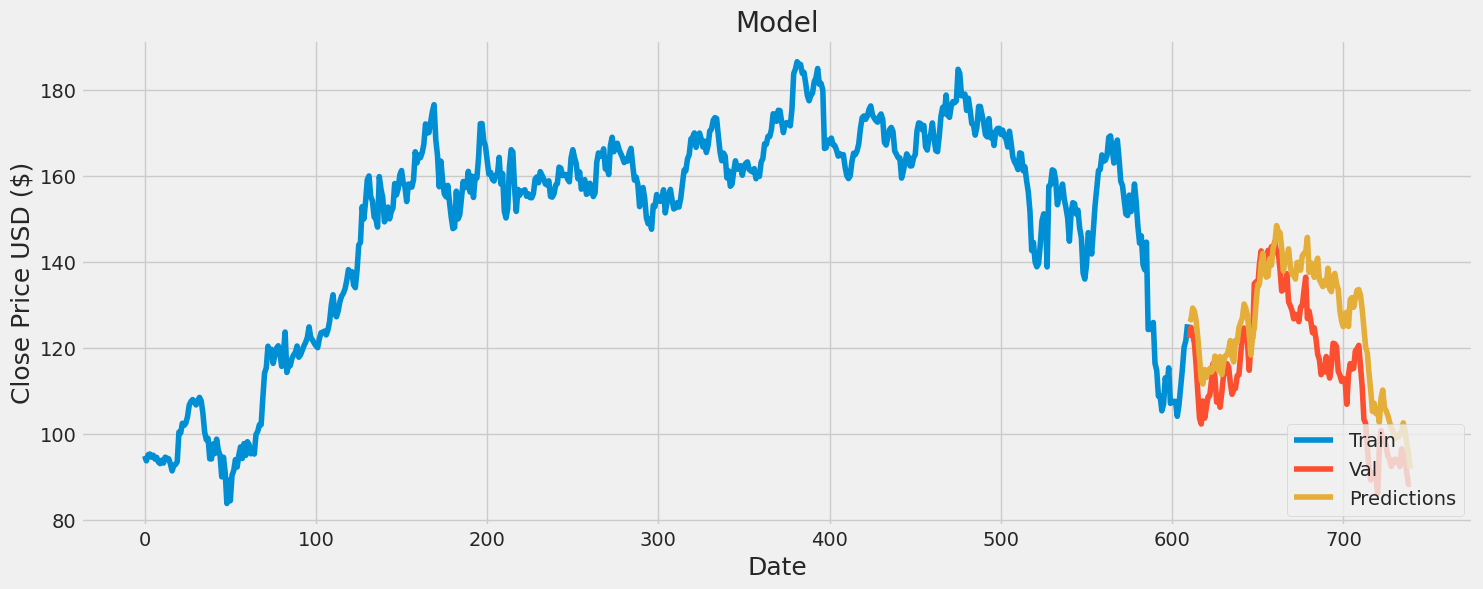

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Decisison Tree Regressor model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import scipy
from sklearn.tree import DecisionTreeRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def dtr_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
         "max_depth": params["max_depth"],
         "min_samples_split": params["min_samples_split"],
         "min_samples_leaf": params["min_samples_split"],
}
    model = DecisionTreeRegressor(random_state=random_state, **params)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
dtr_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
)
dtr_model.fit(x_train_tsf_scaled, y_train)
dtr_train_results = get_results(dtr_model, x_train_tsf_scaled, y_train)
dtr_val_results = get_results(dtr_model, x_val_tsf_scaled, y_val)
dtr_test_results = get_results(dtr_model, x_test_tsf_scaled, y_test)
print("Train results: ", dtr_train_results)
print("Val results: ", dtr_val_results)
print("Test results: ", dtr_test_results)

Train results:  {'mse': 0.000392862954313051, 'mae': 0.014024879027918838, 'mape': 0.0241968214322486}
Val results:  {'mse': 0.04661811125182719, 'mae': 0.1609923861091901, 'mape': 0.3492391430971631}
Test results:  {'mse': 0.04493925903926964, 'mae': 0.15119083147491677, 'mape': 0.39862029485255973}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(dtr_model.predict(x_val_tsf_scaled), 1)
)

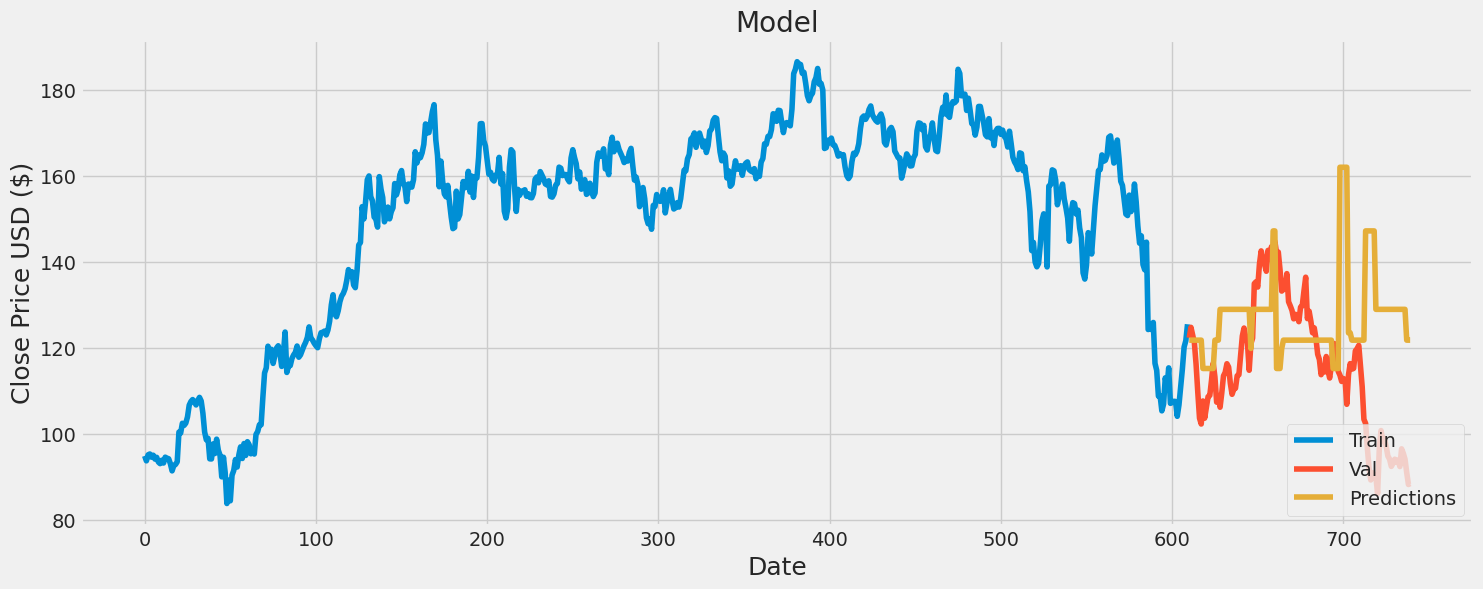

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Random Forest Regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def rf_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
   random_state=42,
   cv=(x_val_tsf_scaled, y_val),
):
   params = {
      "n_estimators": params["n_estimators"],
      "max_depth": params["max_depth"],
      "min_samples_split": params["min_samples_split"],
      "min_samples_leaf": params["min_samples_split"],
}
   model = RandomForestRegressor(random_state=random_state, n_jobs=-1, **params)
   fit_model = model.fit(X, y)
   score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
   return score

In [ ]:
rf_model = RandomForestRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    max_depth=best["max_depth"],
    min_samples_split=best["min_samples_split"],
    min_samples_leaf=best["min_samples_leaf"],
    n_jobs=-1,
)
rf_model.fit(x_train_tsf_scaled, y_train)
rf_train_results = get_results(rf_model, x_train_tsf_scaled, y_train)
rf_val_results = get_results(rf_model, x_val_tsf_scaled, y_val)
rf_test_results = get_results(rf_model, x_test_tsf_scaled, y_test)
print("Train results: ", rf_train_results)
print("Val results: ", rf_val_results)
print("Test results: ", rf_test_results)

Train results:  {'mse': 0.0006547837124747424, 'mae': 0.016761002963829704, 'mape': 0.02911503204636443}
Val results:  {'mse': 0.030504572446901412, 'mae': 0.13383659259709993, 'mape': 0.31597415985781946}
Test results:  {'mse': 0.032103209882165765, 'mae': 0.15092570938865982, 'mape': 0.4480763509390516}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(rf_model.predict(x_val_tsf_scaled), 1)
)

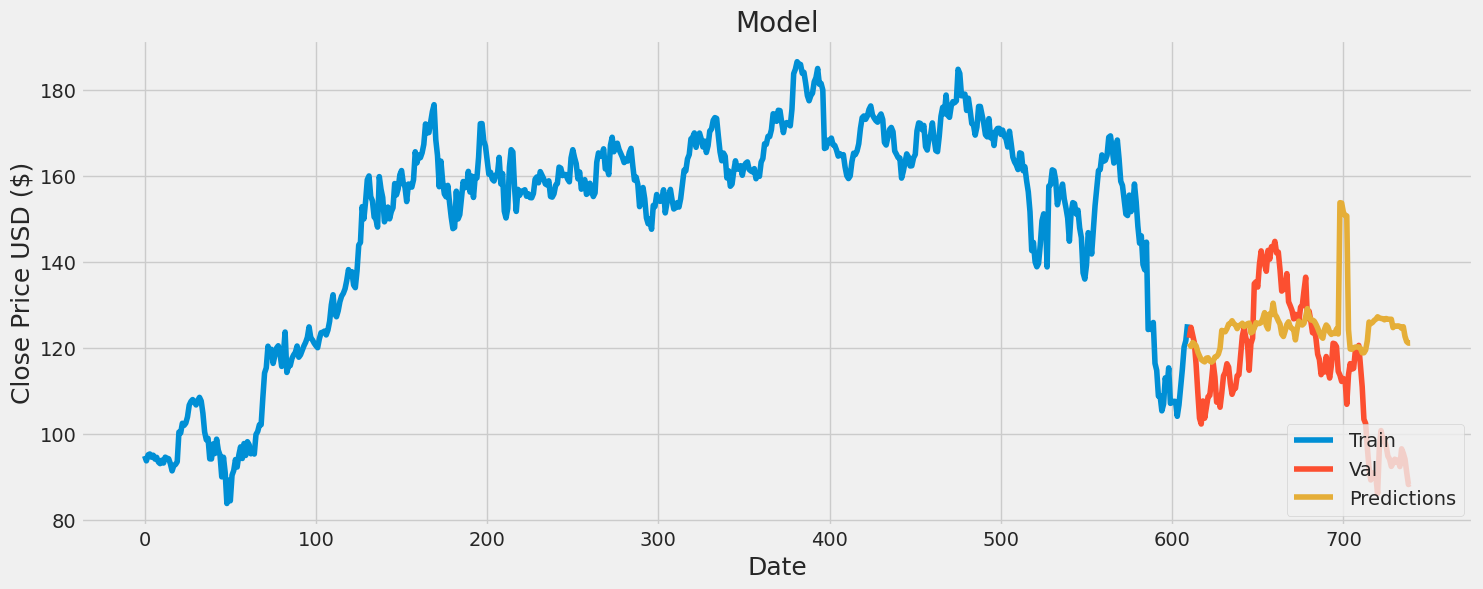

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Gradient Boosting Regressor model**

In [ ]:
from lightgbm import LGBMRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error

In [ ]:
def lgbm_mse_cv(
    params,
    X=x_train_tsf_scaled,
    y=y_train,
    random_state=42,
    cv=(x_val_tsf_scaled, y_val),
):
    params = {
        "learning_rate": params["learning_rate"],
        "n_estimators": params["n_estimators"],
        "colsample_bytree": params["colsample_bytree"],
        "subsample": params["subsample"],
}
    model = LGBMRegressor(random_state=42, n_jobs=-1)
    fit_model = model.fit(X, y)
    score = mean_squared_error(fit_model.predict(cv[0]), cv[1])
    return score

In [ ]:
lgbm_model = LGBMRegressor(
    random_state=42,
    n_estimators=best["n_estimators"],
    n_jobs=-1,
)

In [ ]:
lgbm_model.fit(x_train_tsf_scaled, y_train)
lgbm_train_results = get_results(lgbm_model, x_train_tsf_scaled, y_train)
lgbm_val_results = get_results(lgbm_model, x_val_tsf_scaled, y_val)
lgbm_test_results = get_results(lgbm_model, x_test_tsf_scaled, y_test)
print("Train results: ", lgbm_train_results)
print("Val results: ", lgbm_val_results)
print("Test results: ", lgbm_test_results)

Train results:  {'mse': 1.8520037228810284e-06, 'mae': 0.0003137520955105104, 'mape': 0.0007821939808125206}
Val results:  {'mse': 0.03782198876503786, 'mae': 0.15021265400528244, 'mape': 0.3326029114062212}
Test results:  {'mse': 0.041881527439836225, 'mae': 0.1905437391048254, 'mape': 0.5227873171243}


# **Visualising the data**

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : -int(np.ceil(len(dataset) * 0.15))]
valid["Predictions"] = data_scaler.inverse_transform(
    np.expand_dims(lgbm_model.predict(x_val_tsf_scaled), 1)
)


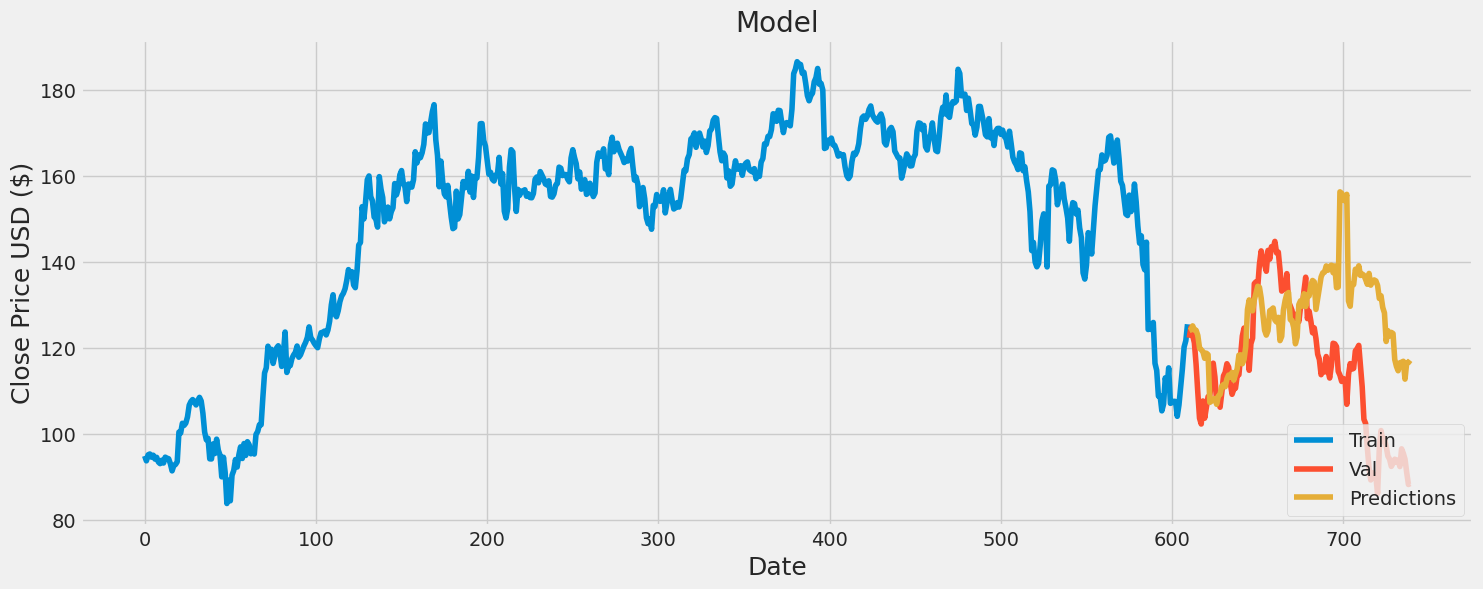

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

# **Using Prophet model**

In [ ]:
dfg=pd.read_csv('/content/Google.csv')
dfM=pd.read_csv('/content/META.csv')
dfm=pd.read_csv('/content/Microsoft.csv')
dfa=pd.read_csv('/content/AMAZON.csv')

In [ ]:
dfg.isnull().sum()
dfM.isnull().sum()
dfm.isnull().sum()
dfa.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
dfg.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   104.342808  105.892337  103.119244  104.545006  104.545006   
std     10.725169   10.855443   10.717420   10.836630   10.836630   
min     85.510002   86.550003   83.449997   83.489998   83.489998   
25%     95.749998   97.344997   94.440003   95.835001   95.835001   
50%    102.799999  104.205002  101.857502  103.549999  103.549999   
75%    112.108874  114.039574  110.878574  112.274124  112.274124   
max    127.574997  129.550003  125.970001  127.910004  127.910004   

             Volume  
count  2.500000e+02  
mean   2.774022e+07  
std    1.097724e+07  
min    8.567800e+06  
25%    2.101290e+07  
50%    2.496995e+07  
75%    3.132605e+07  
max    9.779860e+07

In [ ]:
dfM.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   168.920800  172.124360  166.682680  169.468440  169.468440   
std     45.801821   46.296720   45.589156   46.048968   46.048968   
min     90.080002   90.459999   88.089996   88.910004   88.910004   
25%    132.899997  136.827503  131.489994  133.284996  133.284996   
50%    165.334999  168.089996  161.620002  164.319999  164.319999   
75%    199.732495  201.682495  195.924995  199.309998  199.309998   
max    284.750000  287.850006  280.130005  281.829987  281.829987   

             Volume  
count  2.500000e+02  
mean   3.255829e+07  
std    2.203708e+07  
min    1.200760e+07  
25%    2.121332e+07  
50%    2.646955e+07  
75%    3.541882e+07  
max    2.323166e+08

In [ ]:
dfm.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   264.925440  268.071760  262.061160  265.261760  263.946007   
std     28.793224   28.744187   28.930344   28.979257   29.327804   
min    217.550003  220.410004  213.429993  214.250000  212.649246   
25%    243.120003  245.302502  240.187500  242.482498  240.980095   
50%    257.544999  260.414994  254.540001  257.070007  256.089707   
75%    282.087494  284.294990  279.170006  282.739991  280.751213   
max    351.320007  351.470001  341.950012  348.100006  348.100006   

             Volume  
count  2.500000e+02  
mean   2.882395e+07  
std    1.018135e+07  
min    9.200800e+06  
25%    2.249102e+07  
50%    2.657605e+07  
75%    3.171822e+07  
max    8.610200e+07

In [ ]:
dfa.describe()

Open        High         Low       Close   Adj Close  \
count  871.000000  871.000000  871.000000  871.000000  871.000000   
mean   137.386034  139.205534  135.446171  137.328030  137.328030   
std     29.463067   29.498646   29.283973   29.340839   29.340839   
min     82.075500   83.480003   81.301498   81.820000   81.820000   
25%    108.180001  111.404999  106.855004  108.824001  108.824001   
50%    148.500000  151.199997  144.399994  147.898499  147.898499   
75%    163.468002  165.042000  161.359245  163.229751  163.229751   
max    187.199997  188.654007  184.839493  186.570496  186.570496   

             Volume  
count  8.710000e+02  
mean   7.891493e+07  
std    3.425060e+07  
min    2.903800e+07  
25%    5.625400e+07  
50%    6.881800e+07  
75%    9.207900e+07  
max    3.113460e+08

In [ ]:
company_list = [dfg,dfM,dfm,dfa]
company_name = ["GOOGLE", "MICROSOFT","META","AMAZON"]
tech_list = ['GOOG', 'MSFT','META' 'AMZN']

In [ ]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x600 with 0 Axes>

In [ ]:
dfg1=dfg[['Date','Adj Close']]
dfM1=dfM[['Date','Adj Close']]
dfm1=dfm[['Date','Adj Close']]
dfa1=dfa[['Date','Adj Close']]

In [ ]:
dfg1.columns=['ds','y']
dfM1.columns=['ds','y']
dfm1.columns=['ds','y']
dfa1.columns=['ds','y']

In [ ]:
model=Prophet()
model.fit(dfg1)

In [ ]:
model2=Prophet()
model2.fit(dfM1)



In [ ]:
model3=Prophet()
model3.fit(dfm1)

In [ ]:
model4=Prophet()
model4.fit(dfa1)

# **For META stocks**

In [ ]:
future_d_m = model3.make_future_dataframe(periods=40, freq='MS')
forecast_m= model3.predict(future_d_m)

In [ ]:
forecast_m[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
285 2026-06-01  1172.650094  505.624130  1891.715769
286 2026-07-01  1195.107761  504.521239  1949.626267
287 2026-08-01  1217.437335  501.061946  2007.874205
288 2026-09-01  1242.520901  488.568940  2061.635906
289 2026-10-01  1267.622264  484.908670  2132.364393

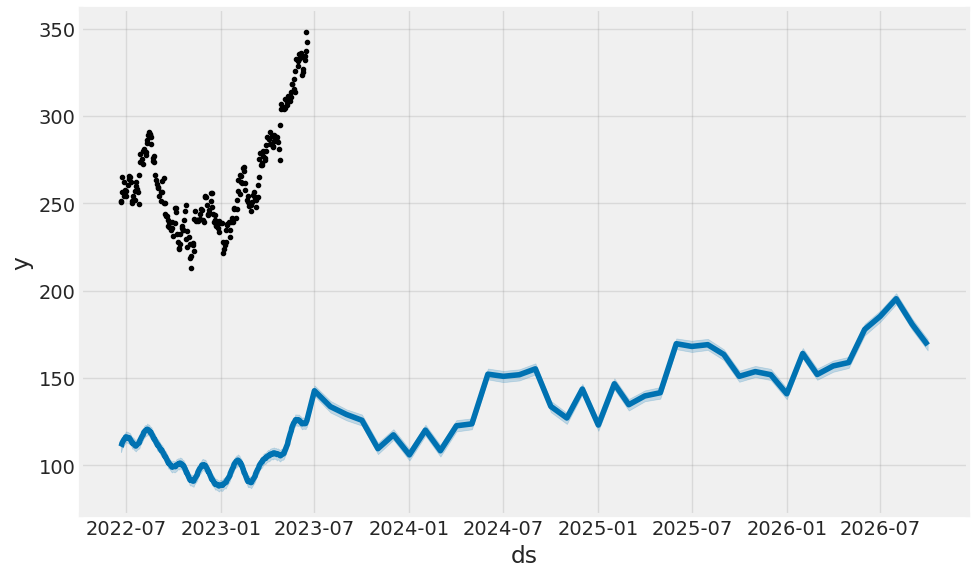

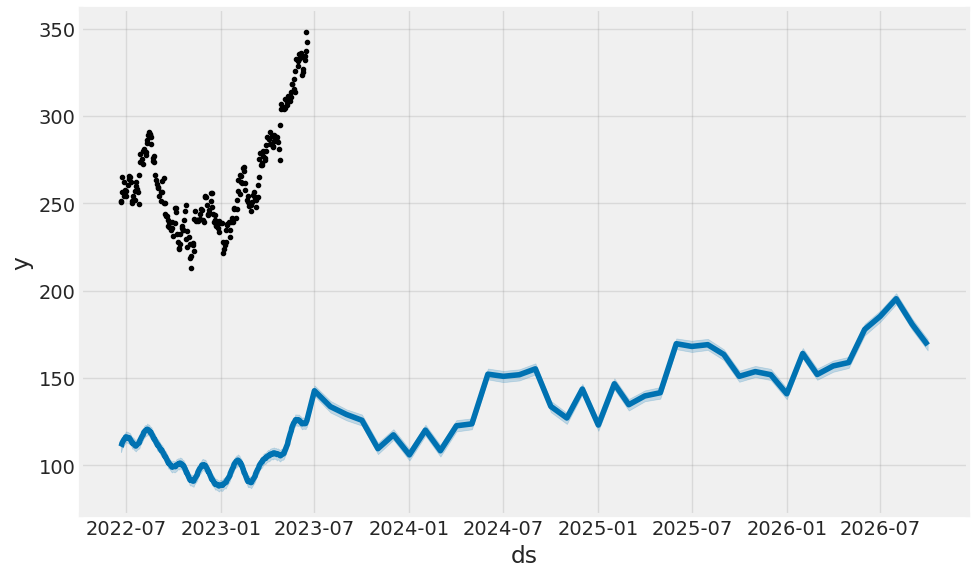

In [ ]:
model3.plot(forecast_g, uncertainty=True)

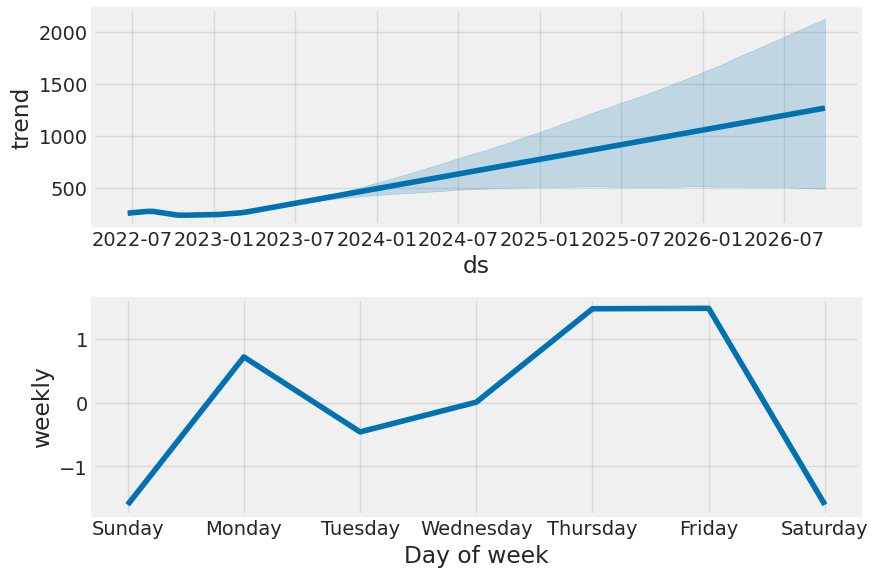

In [ ]:
fig_m=model3.plot_components(forecast_m)

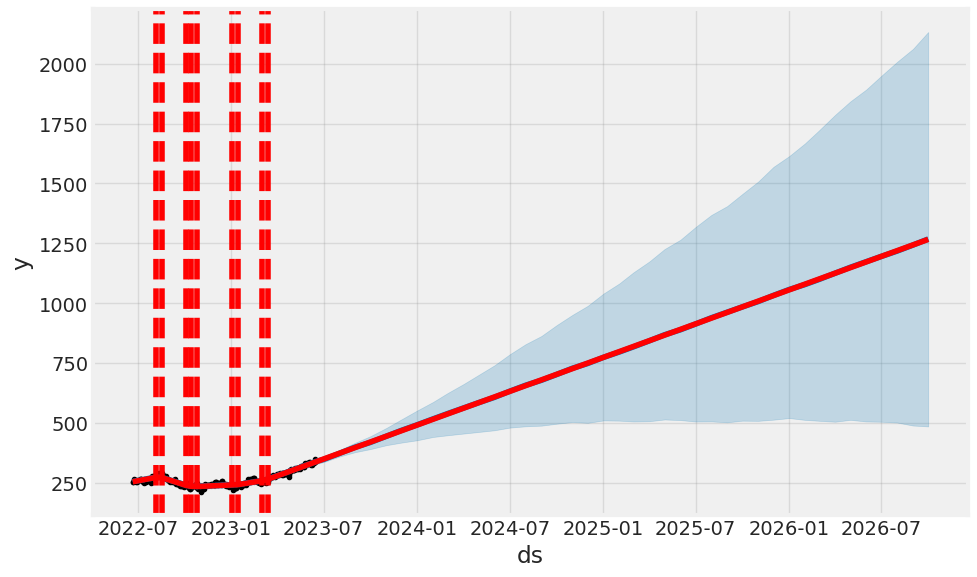

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_m =model3.plot(forecast_m)
a = add_changepoints_to_plot(fig_m.gca(),model3,forecast_m)

In [ ]:
model3.changepoints

8     2022-07-01
16    2022-07-14
24    2022-07-26
32    2022-08-05
40    2022-08-17
48    2022-08-29
56    2022-09-09
64    2022-09-21
72    2022-10-03
80    2022-10-13
88    2022-10-25
96    2022-11-04
103   2022-11-15
111   2022-11-28
119   2022-12-08
127   2022-12-20
135   2023-01-03
143   2023-01-13
151   2023-01-26
159   2023-02-07
167   2023-02-17
175   2023-03-02
183   2023-03-14
191   2023-03-24
199   2023-04-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/653qmwpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/s3mi1a7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31964', 'data', 'file=/tmp/tmpyq2bhjh5/653qmwpt.json', 'init=/tmp/tmpyq2bhjh5/s3mi1a7j.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modeldy7fkitw/prophet_model-20230718090047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:00:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:00:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


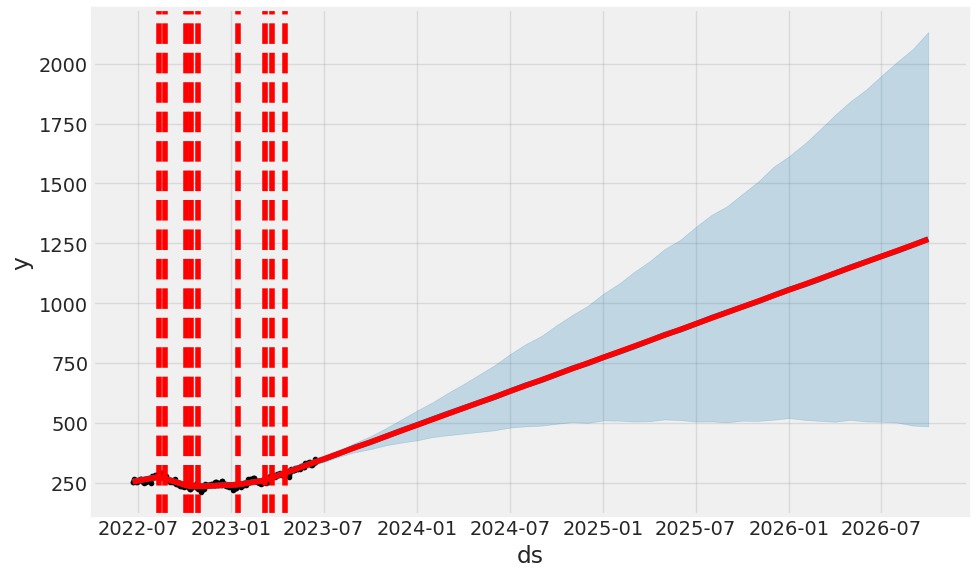

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast_g = pro_change.fit(dfm1).predict(future_d_m)
fig_m= pro_change.plot(forecast_m)
a = add_changepoints_to_plot(fig_m.gca(), pro_change, forecast_m)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/afecuuug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/0sa2pjz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94537', 'data', 'file=/tmp/tmpyq2bhjh5/afecuuug.json', 'init=/tmp/tmpyq2bhjh5/0sa2pjz2.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modeli4vc73y6/prophet_model-20230718090126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


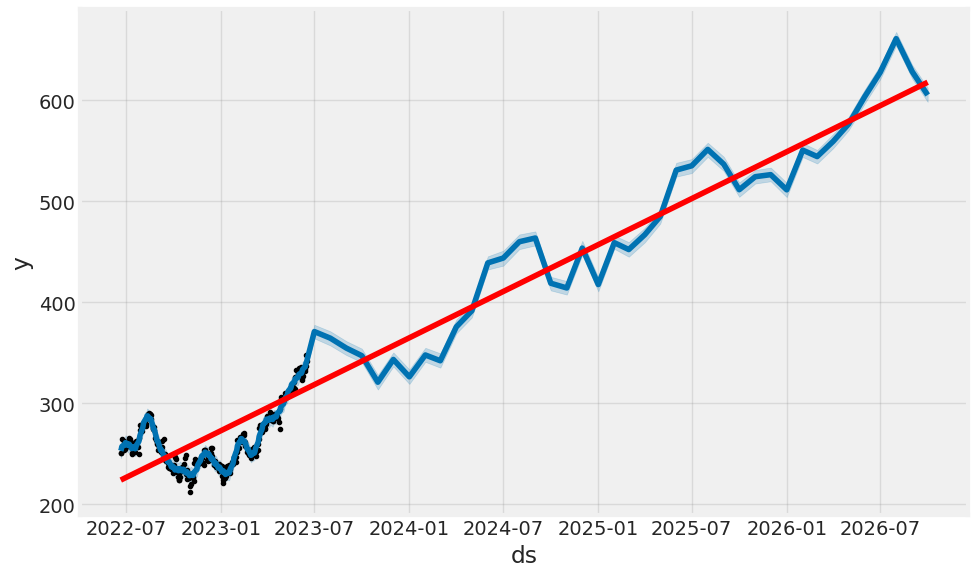

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast_m = pro_change.fit(dfm1).predict(future_d_m)
fig_m= pro_change.plot(forecast_m);
a = add_changepoints_to_plot(fig_m.gca(), pro_change, forecast_m)

# **For Google stocks**

In [ ]:
future_d_g = model.make_future_dataframe(periods=40, freq='MS')
forecast_g = model.predict(future_d_g)

In [ ]:
forecast_g[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
285 2026-06-01  461.621141  264.709399  648.475280
286 2026-07-01  470.318737  263.552387  664.531724
287 2026-08-01  478.001100  263.852835  680.108724
288 2026-09-01  489.660772  260.888111  700.209199
289 2026-10-01  499.296000  264.497224  717.617930

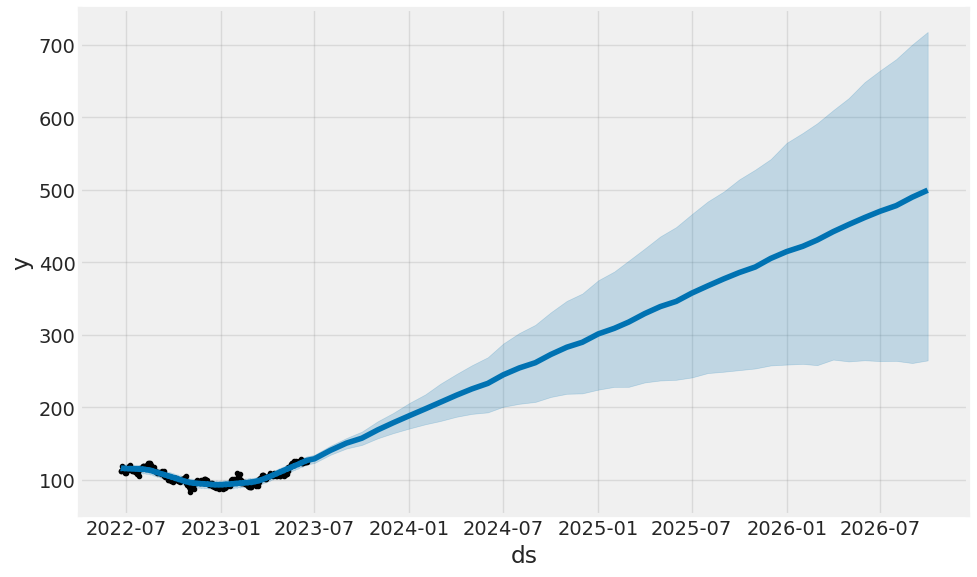

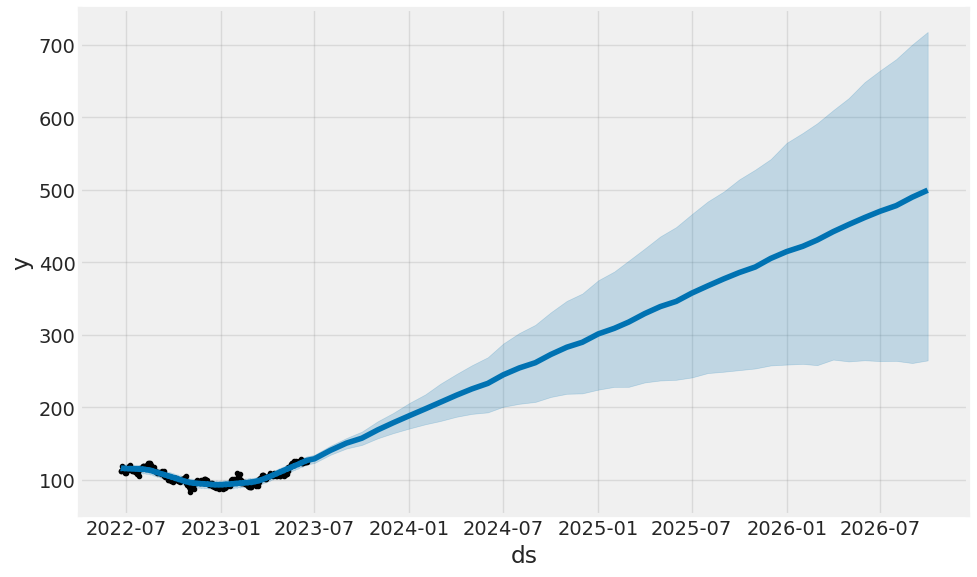

In [ ]:
model.plot(forecast_g, uncertainty=True)

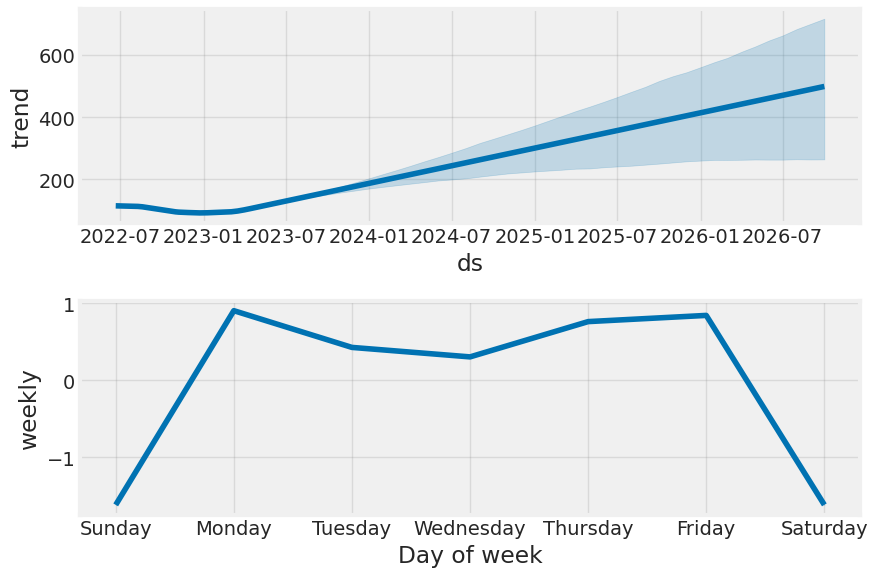

In [ ]:
fig_g=model.plot_components(forecast_g)

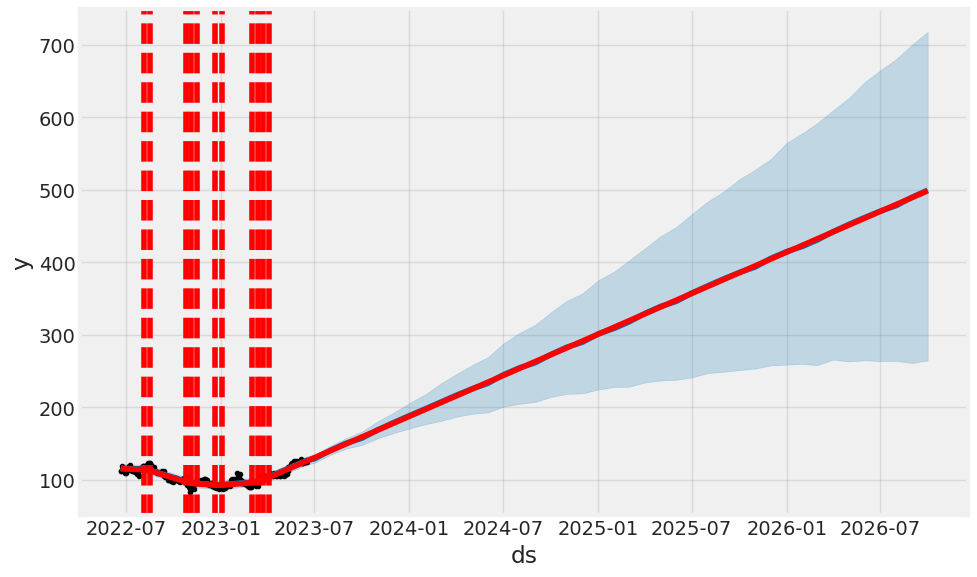

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_g =model.plot(forecast_g)
a = add_changepoints_to_plot(fig_g.gca(),model,forecast_g)

In [ ]:
model.changepoints

8     2022-07-01
16    2022-07-14
24    2022-07-26
32    2022-08-05
40    2022-08-17
48    2022-08-29
56    2022-09-09
64    2022-09-21
72    2022-10-03
80    2022-10-13
88    2022-10-25
96    2022-11-04
103   2022-11-15
111   2022-11-28
119   2022-12-08
127   2022-12-20
135   2023-01-03
143   2023-01-13
151   2023-01-26
159   2023-02-07
167   2023-02-17
175   2023-03-02
183   2023-03-14
191   2023-03-24
199   2023-04-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/zz6ml6d4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/1acprys1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59665', 'data', 'file=/tmp/tmpyq2bhjh5/zz6ml6d4.json', 'init=/tmp/tmpyq2bhjh5/1acprys1.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modele4b7k5nj/prophet_model-20230718085422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


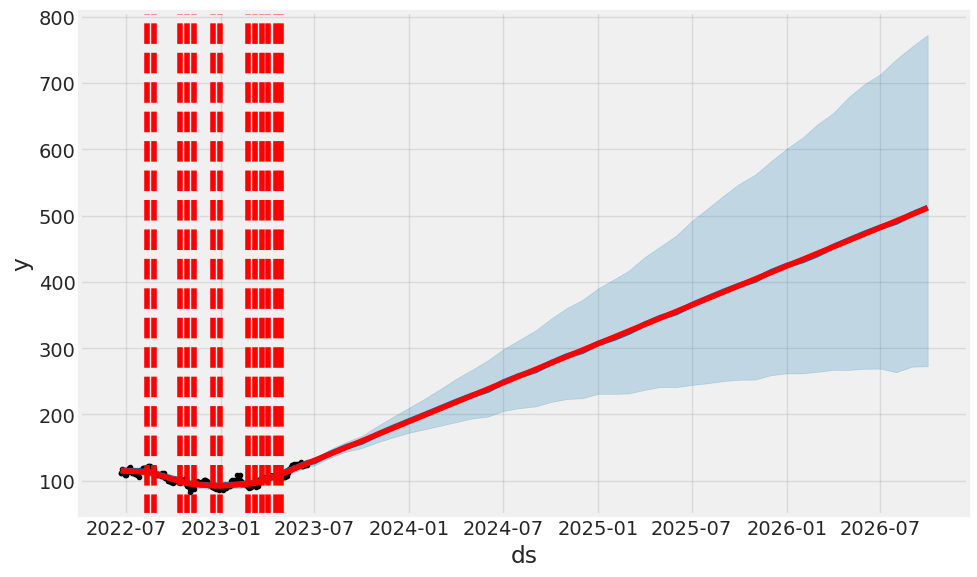

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast_g = pro_change.fit(dfg1).predict(future_d_g)
fig_g= pro_change.plot(forecast_g)
a = add_changepoints_to_plot(fig_g.gca(), pro_change, forecast_g)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/w8vyi8c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/30v9zu3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11944', 'data', 'file=/tmp/tmpyq2bhjh5/w8vyi8c0.json', 'init=/tmp/tmpyq2bhjh5/30v9zu3j.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modelb4jt0a_2/prophet_model-20230718085454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


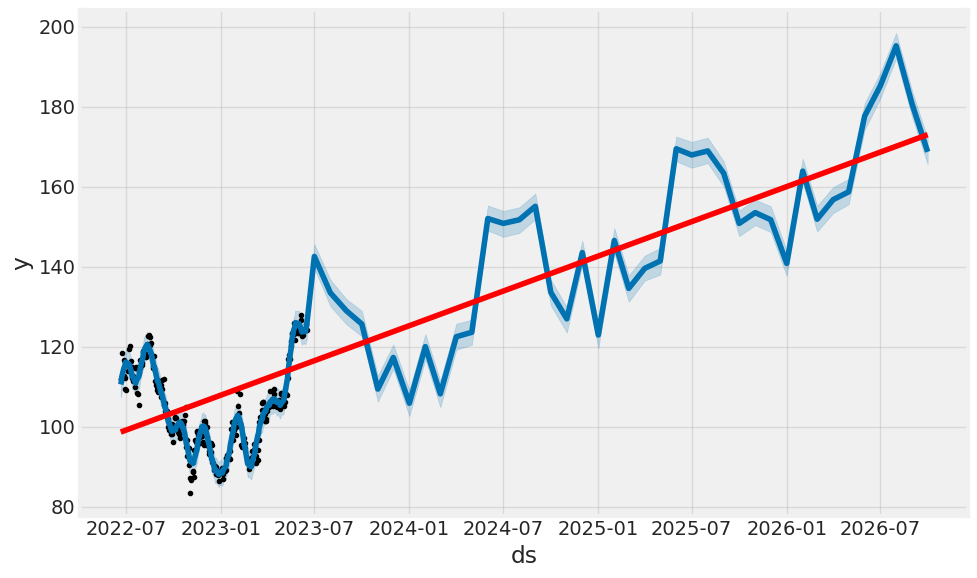

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast_g = pro_change.fit(dfg1).predict(future_d_g)
fig_g= pro_change.plot(forecast_g);
a = add_changepoints_to_plot(fig_g.gca(), pro_change, forecast_g)

# **For MICROSOFT dataset**

In [ ]:
future_d_M = model.make_future_dataframe(periods=40, freq='MS')
forecast_M = model.predict(future_d_M)

In [ ]:
forecast_M[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
285 2026-06-01  461.621141  266.952050  649.941873
286 2026-07-01  470.318737  267.323378  663.338858
287 2026-08-01  478.001100  265.542351  681.452491
288 2026-09-01  489.660772  271.513708  702.552239
289 2026-10-01  499.296000  269.918636  716.055365

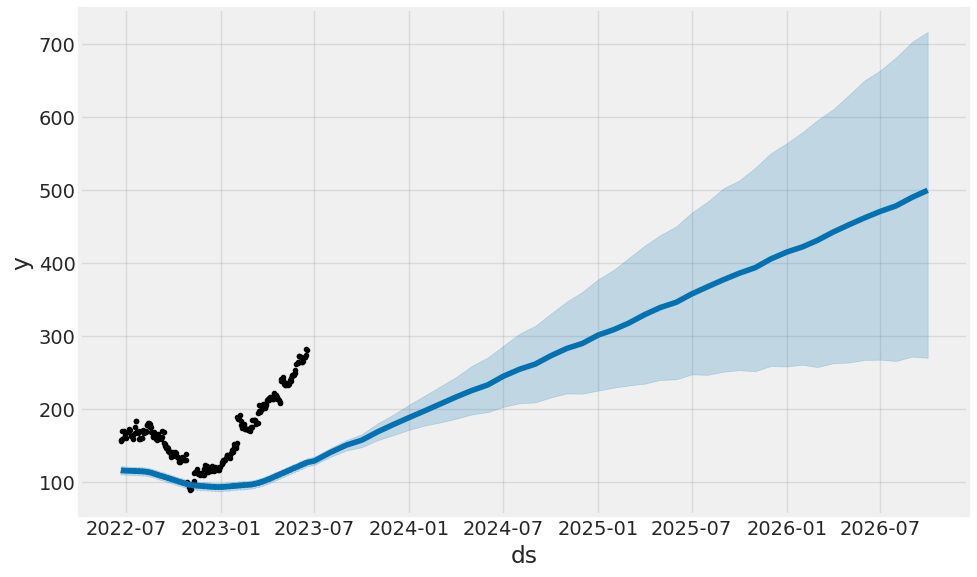

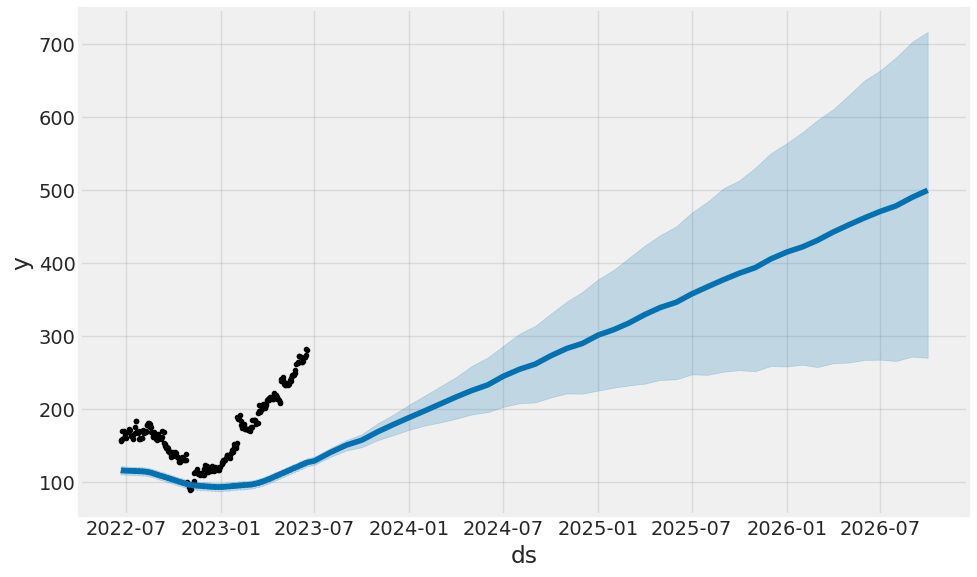

In [ ]:
model2.plot(forecast_M,uncertainty=True)

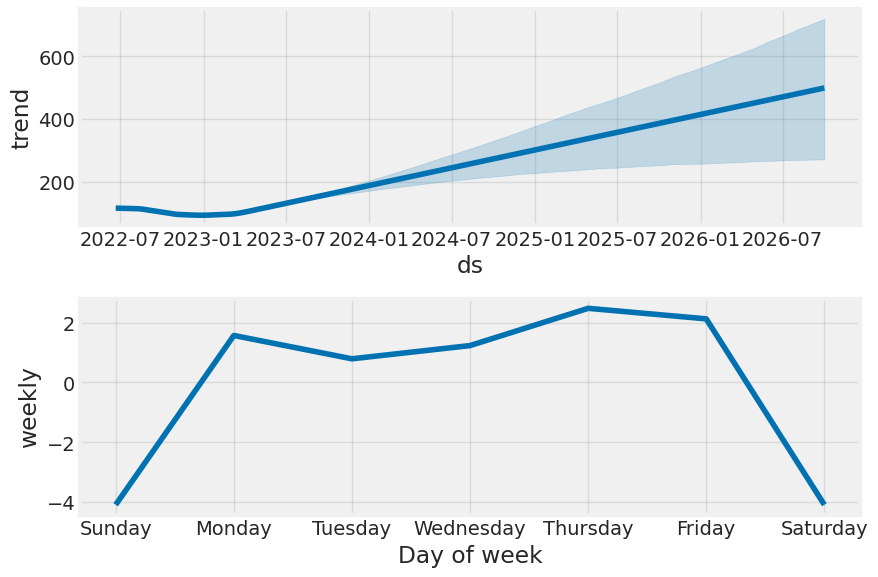

In [ ]:
fig_M=model2.plot_components(forecast_M)

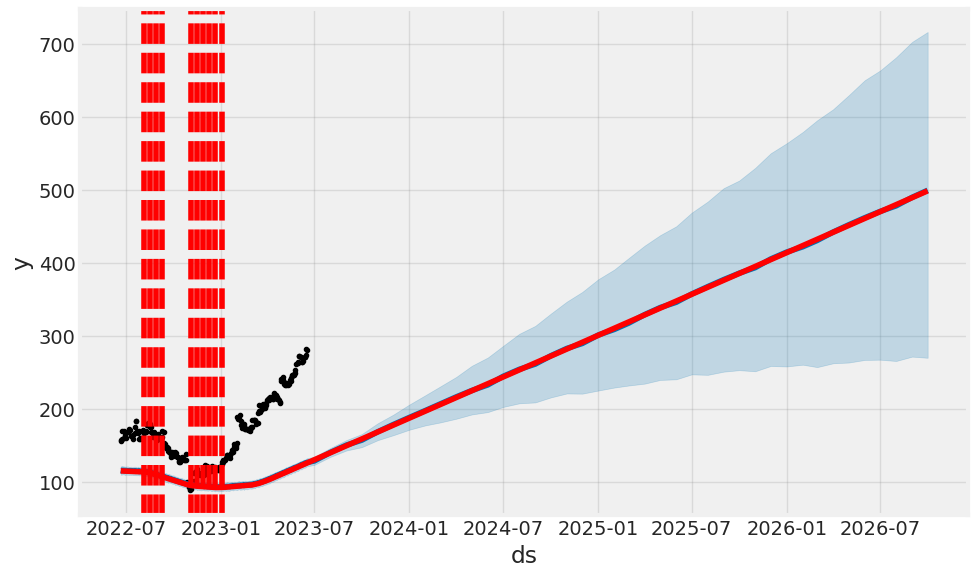

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_M=model2.plot(forecast_M)
a = add_changepoints_to_plot(fig_M.gca(),model2,forecast_M)

In [ ]:
model2.changepoints

8     2022-07-01
16    2022-07-14
24    2022-07-26
32    2022-08-05
40    2022-08-17
48    2022-08-29
56    2022-09-09
64    2022-09-21
72    2022-10-03
80    2022-10-13
88    2022-10-25
96    2022-11-04
103   2022-11-15
111   2022-11-28
119   2022-12-08
127   2022-12-20
135   2023-01-03
143   2023-01-13
151   2023-01-26
159   2023-02-07
167   2023-02-17
175   2023-03-02
183   2023-03-14
191   2023-03-24
199   2023-04-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/0tv_ulhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/qp3x2n_6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40352', 'data', 'file=/tmp/tmpyq2bhjh5/0tv_ulhz.json', 'init=/tmp/tmpyq2bhjh5/qp3x2n_6.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modeljlt34hlw/prophet_model-20230718090718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


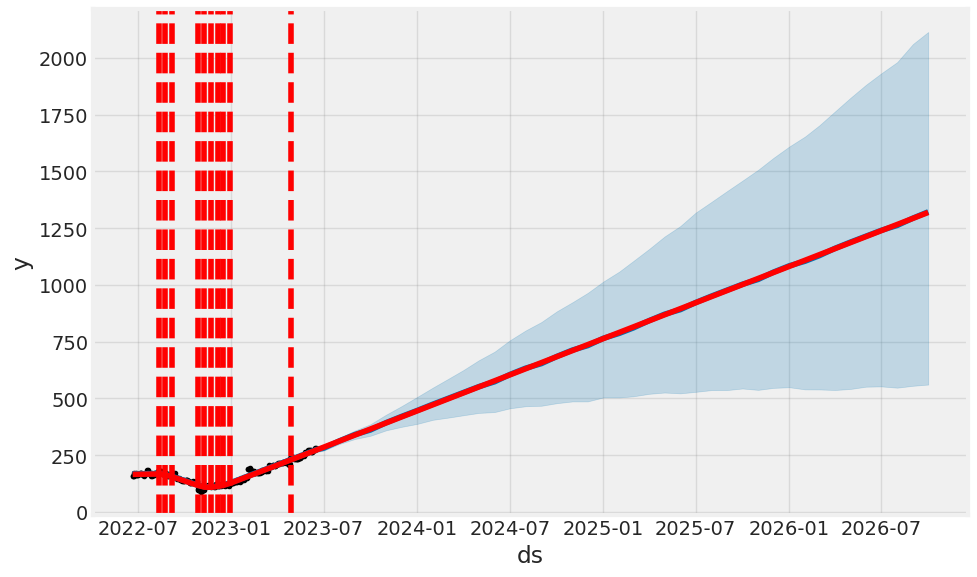

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast_M = pro_change.fit(dfM1).predict(future_d_M)
fig_M= pro_change.plot(forecast_M)
a = add_changepoints_to_plot(fig_M.gca(), pro_change, forecast_M)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/rbm5xau2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/y_7vdab_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99063', 'data', 'file=/tmp/tmpyq2bhjh5/rbm5xau2.json', 'init=/tmp/tmpyq2bhjh5/y_7vdab_.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modelm01q3oe2/prophet_model-20230718090816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


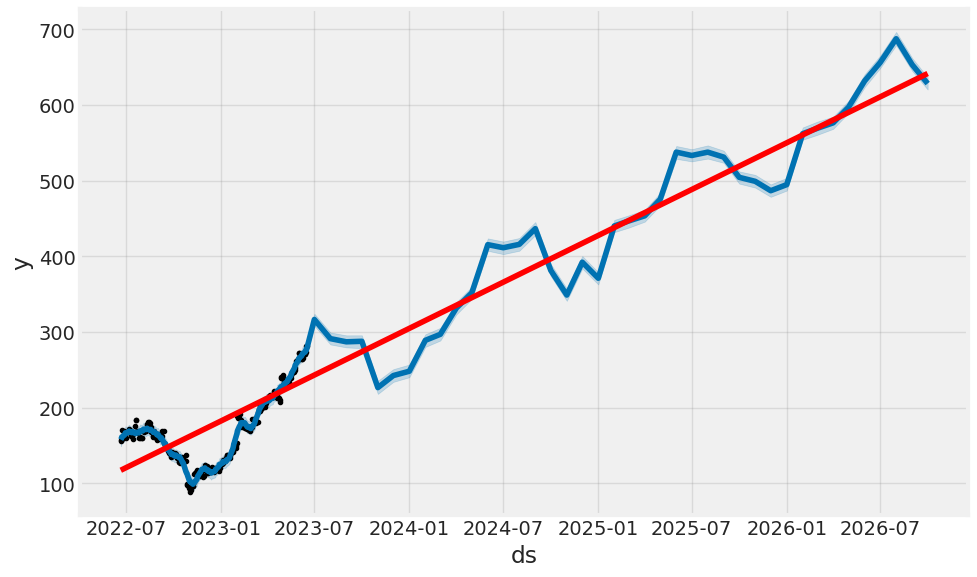

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast_M = pro_change.fit(dfM1).predict(future_d_M)
fig_M= pro_change.plot(forecast_M);
a = add_changepoints_to_plot(fig_M.gca(), pro_change, forecast_M)

# **For Amazon stocks**

In [ ]:
future_d_a= model.make_future_dataframe(periods=40, freq='MS')
forecast_a = model.predict(future_d_a)

In [ ]:
forecast_a[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
285 2026-06-01  461.621141  264.090191  671.927087
286 2026-07-01  470.318737  262.464845  688.597558
287 2026-08-01  478.001100  265.732102  706.389299
288 2026-09-01  489.660772  269.941193  724.445227
289 2026-10-01  499.296000  269.835859  751.019772

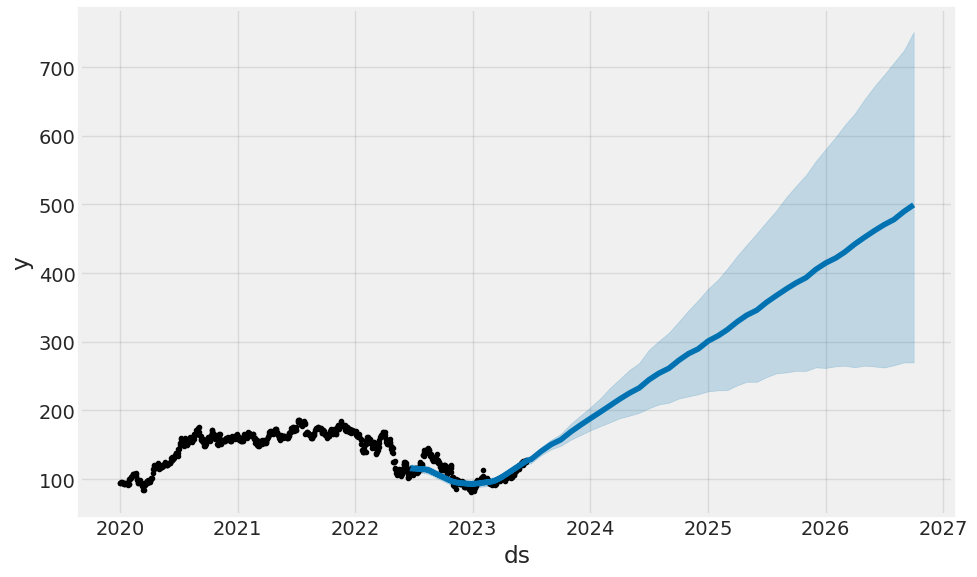

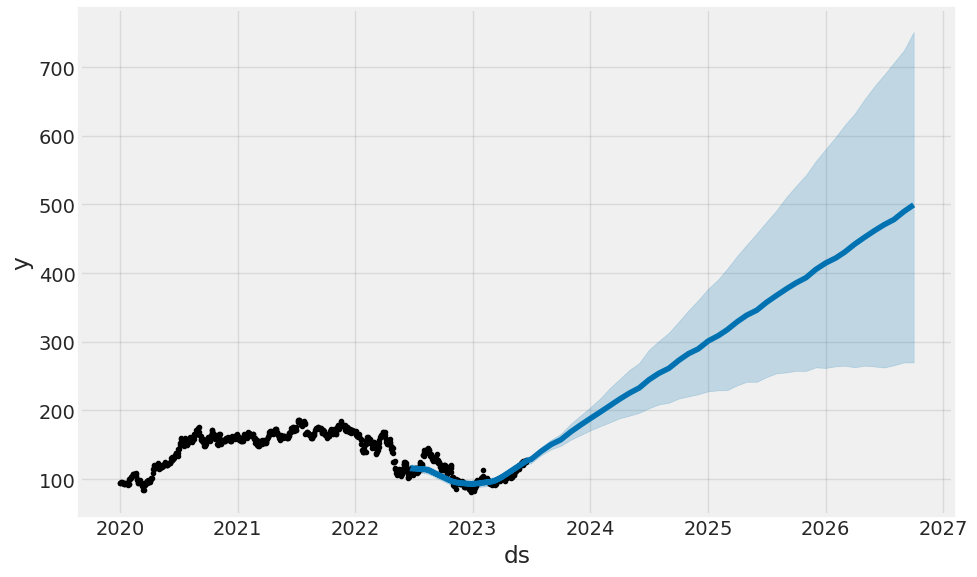

In [ ]:
model4.plot(forecast_a,uncertainty=True)

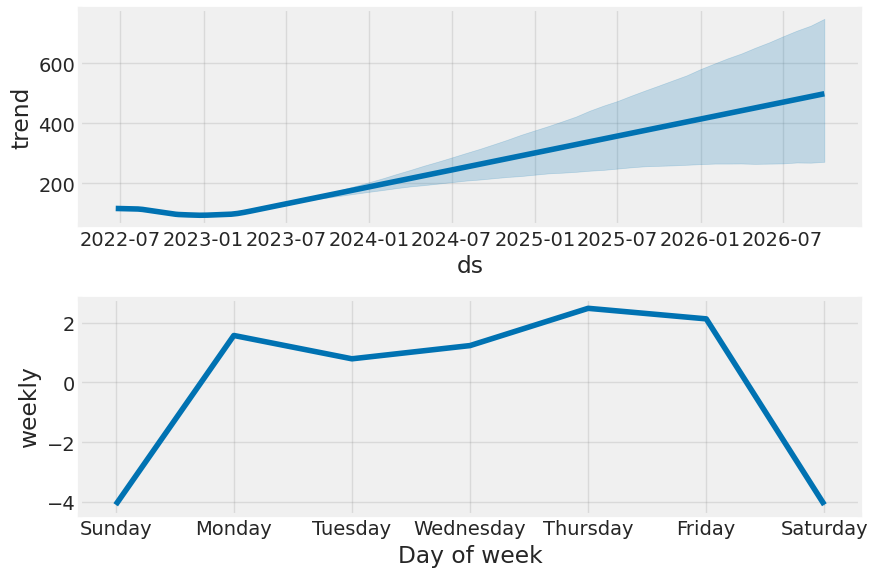

In [ ]:
fig_a=model2.plot_components(forecast_a)

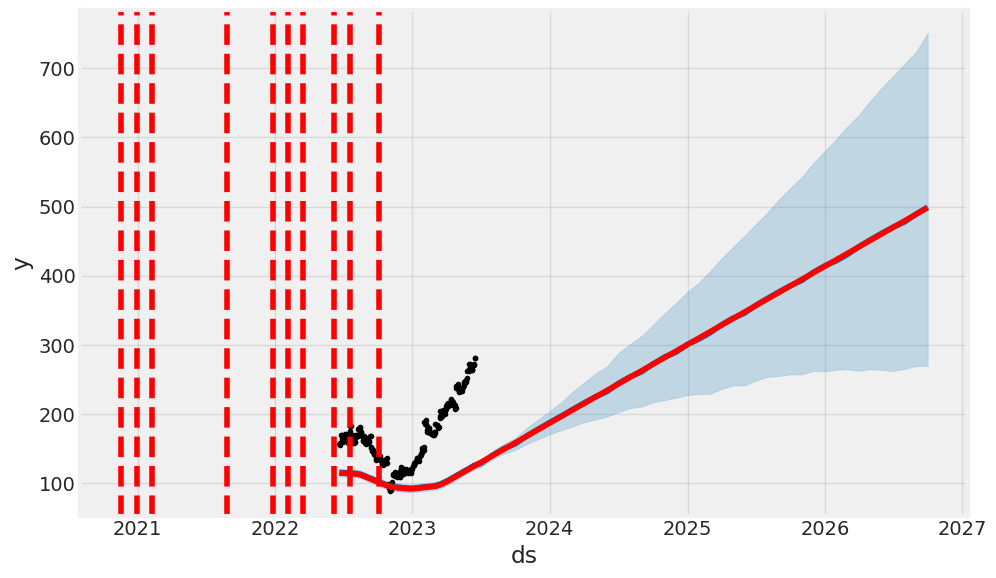

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig_a=model2.plot(forecast_a)
a = add_changepoints_to_plot(fig_a.gca(),model4,forecast_a)

In [ ]:
model4.changepoints

28    2020-02-12
56    2020-03-24
83    2020-05-01
111   2020-06-11
139   2020-07-22
167   2020-08-31
195   2020-10-09
222   2020-11-17
250   2020-12-29
278   2021-02-09
306   2021-03-22
334   2021-04-30
361   2021-06-09
389   2021-07-20
417   2021-08-27
445   2021-10-07
473   2021-11-16
500   2021-12-27
528   2022-02-04
556   2022-03-17
584   2022-04-27
612   2022-06-07
639   2022-07-18
667   2022-08-25
695   2022-10-05
Name: ds, dtype: datetime64[ns]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/jsswu467.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/ijqsbbag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67195', 'data', 'file=/tmp/tmpyq2bhjh5/jsswu467.json', 'init=/tmp/tmpyq2bhjh5/ijqsbbag.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_modelcu5ciifa/prophet_model-20230718091311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


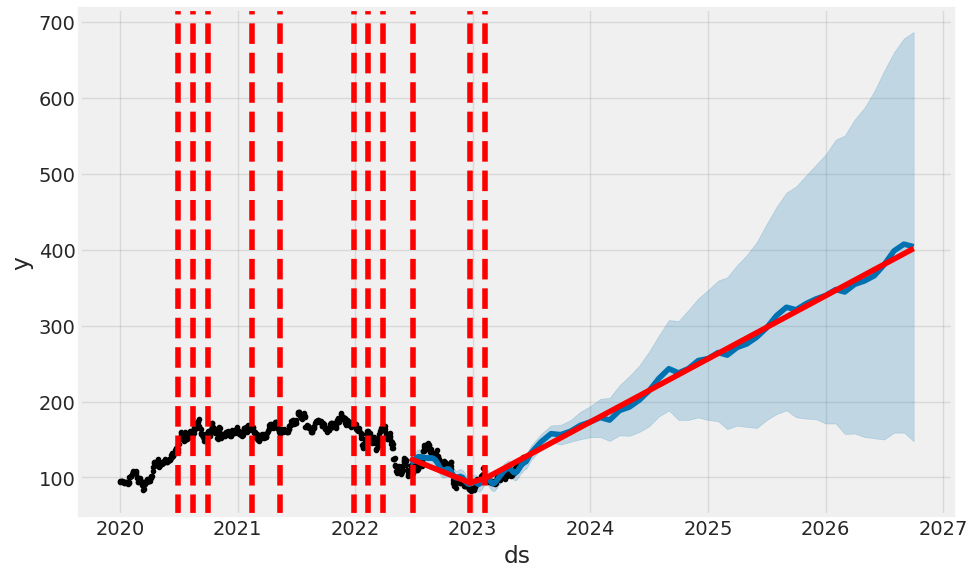

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast_a = pro_change.fit(dfa1).predict(future_d_a)
fig_a= pro_change.plot(forecast_a)
a = add_changepoints_to_plot(fig_a.gca(), pro_change, forecast_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/0wqgpcl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyq2bhjh5/94f6ocmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31148', 'data', 'file=/tmp/tmpyq2bhjh5/0wqgpcl6.json', 'init=/tmp/tmpyq2bhjh5/94f6ocmi.json', 'output', 'file=/tmp/tmpyq2bhjh5/prophet_model1nvc6svd/prophet_model-20230718091411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


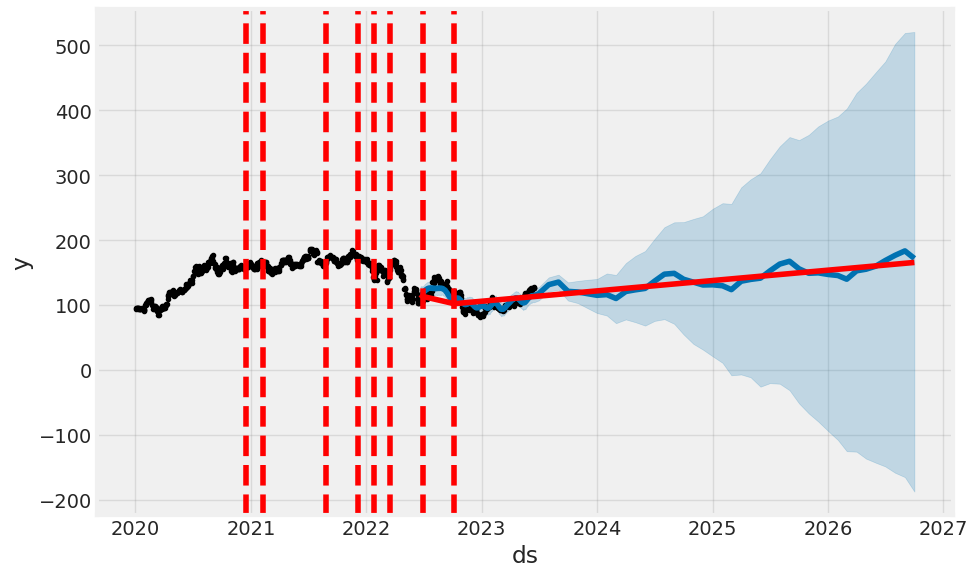

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast_a = pro_change.fit(dfa1).predict(future_d_a)
fig_a= pro_change.plot(forecast_a);
a = add_changepoints_to_plot(fig_a.gca(), pro_change, forecast_a)